<a href="https://www.kaggle.com/code/ahmedabdelaleem28/no-show-investigation?scriptVersionId=104041610" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/no-show-investigate-dataset/noshowappointments-kagglev2-may-2016.csv




# Project: Investigate the No-show-appointment data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

### Dataset Description
> The data set have information about more than 110k patients who scheduled appointments in Brazil. The data main purpose is the showing up of the patients. It has information that includes the date the scheduled at, the oppointment date, whether they have some diseases or not and other information.

### Question for Analysis


>Does the age, gender, time period between scheduling and appointment, the existence of hypertension, diabetes, alcoholism, scholarship, handicap or whether the patient received a message or not affects the precentage of patients who showed up to patients who scheduled meetings?  

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:

df = pd.read_csv('/kaggle/input/no-show-investigate-dataset/noshowappointments-kagglev2-may-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.shape

(110527, 14)

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.PatientId.nunique()

62299

In [9]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
df.rename(columns=str.lower, inplace = True)
df.rename(columns={'patientid': 'patient_id', 'appointmentid':'appointment_id','scheduledday': 'scheduled_day', 'appointmentday':'appointment_day','no-show': 'no_show', 'hipertension':'hypertension', 'handcap':'handicap' }, inplace = True)

In [11]:
#checking that changing the names has gone right.
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Checking column by column

From the describtion, it's obvious that columns scholarship, hypertension, diabetes, alcoholism and sms_received have no problems. They have minimum value of zero, maximum value of 1 and the sum of each column is an integer number, so there's no numbers between zero and 1.

#### Gender

In [12]:
#checking that there're no values other than "M" and "F"
df.gender.value_counts()

F    71840
M    38687
Name: gender, dtype: int64

#### Age

In [13]:
#checking that the mentioned ages are reasonable and representative
print(df.age.min())
print(df.age.max(),'\n\n','value_counts','\n')
print(df.age.value_counts())

-1
115 

 value_counts 

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64





The minimum age is -1 which is impossible, will be droped. Also there are some elder people, their each one is rarely repeated (less than 10 times of repetition). Also they're not so common among people (98 years and older). Therefore, I'm going to consider them as outliers and drop them.

#### Handicap 

In [14]:
#From the decribtion, handicap has other values that 1 and zero,
#while it should be a true or false column
df.handicap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

Handicap has other values than 0 and 1. We're going to consider any value other than 0 to be 1 as it also represent a handicap.

#### no_show

In [15]:
df.no_show.value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

 The (No-show) column has values of "NO" and "Yes", where "NO" means the patient came while "Yes' means the patient didn't show; It would be easier if those values have been changed to 0 are 1.

Checking the cleanliness of neighbourhood and the time period between the oppointment and schedule time is going to be left to their own exploration section.

### Data Cleaning

In [16]:
#droping ages less than 0 and more than 97
df = df[(df.age >=0) & (df.age < 98)]
#checking the droping
df.age.value_counts()

0     3539
1     2273
52    1746
49    1652
53    1651
      ... 
93      53
94      33
95      24
96      17
97      11
Name: age, Length: 98, dtype: int64

In [17]:
#Changing any value (other than zero) in handicap to be 1
df.loc[df.handicap>0, 'handicap']=1
#Checking the changes
df.handicap.value_counts()

0    108273
1      2235
Name: handicap, dtype: int64

In [18]:
#Changing the values of (no_show) from  "NO" and "Yes" to "1" and "0"
df.no_show.replace(['No', 'Yes'], [1,0], inplace = True)
#Checking changes
df.no_show.value_counts()

1    88193
0    22315
Name: no_show, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis



In [19]:
#First I'm going to creat masks
show = df['no_show'] == True
not_show = df['no_show'] ==False

# Research Question

>Does the age, gender, time period between scheduling and appointment, the existence of hypertension, diabetes, alcoholism, scholarship, handicap or whether the patient received a message or not affects the precentage of patients who showed up to patients who scheduled meetings?  


In [20]:
def bar_graph(column, title_1, bar_1, bar_2=0, y_label = 'Precentage(showed/scheduled)', rot  = 0):
    graph = df.groupby([column]).no_show.mean().plot( kind = 'bar', figsize = (40,20),fontsize = 30 )
    graph.set_title(title_1, fontsize = 70);
    if bar_2==0:
        graph.set_xlabel(bar_1, fontsize = 50)
    else:
        
        graph.set_xlabel(bar_1+'                                                           '+bar_2, fontsize = 50);
    graph.set_ylabel(y_label, fontsize = 35);
    
    plt.show();
    print(df.groupby([column]).no_show.mean())


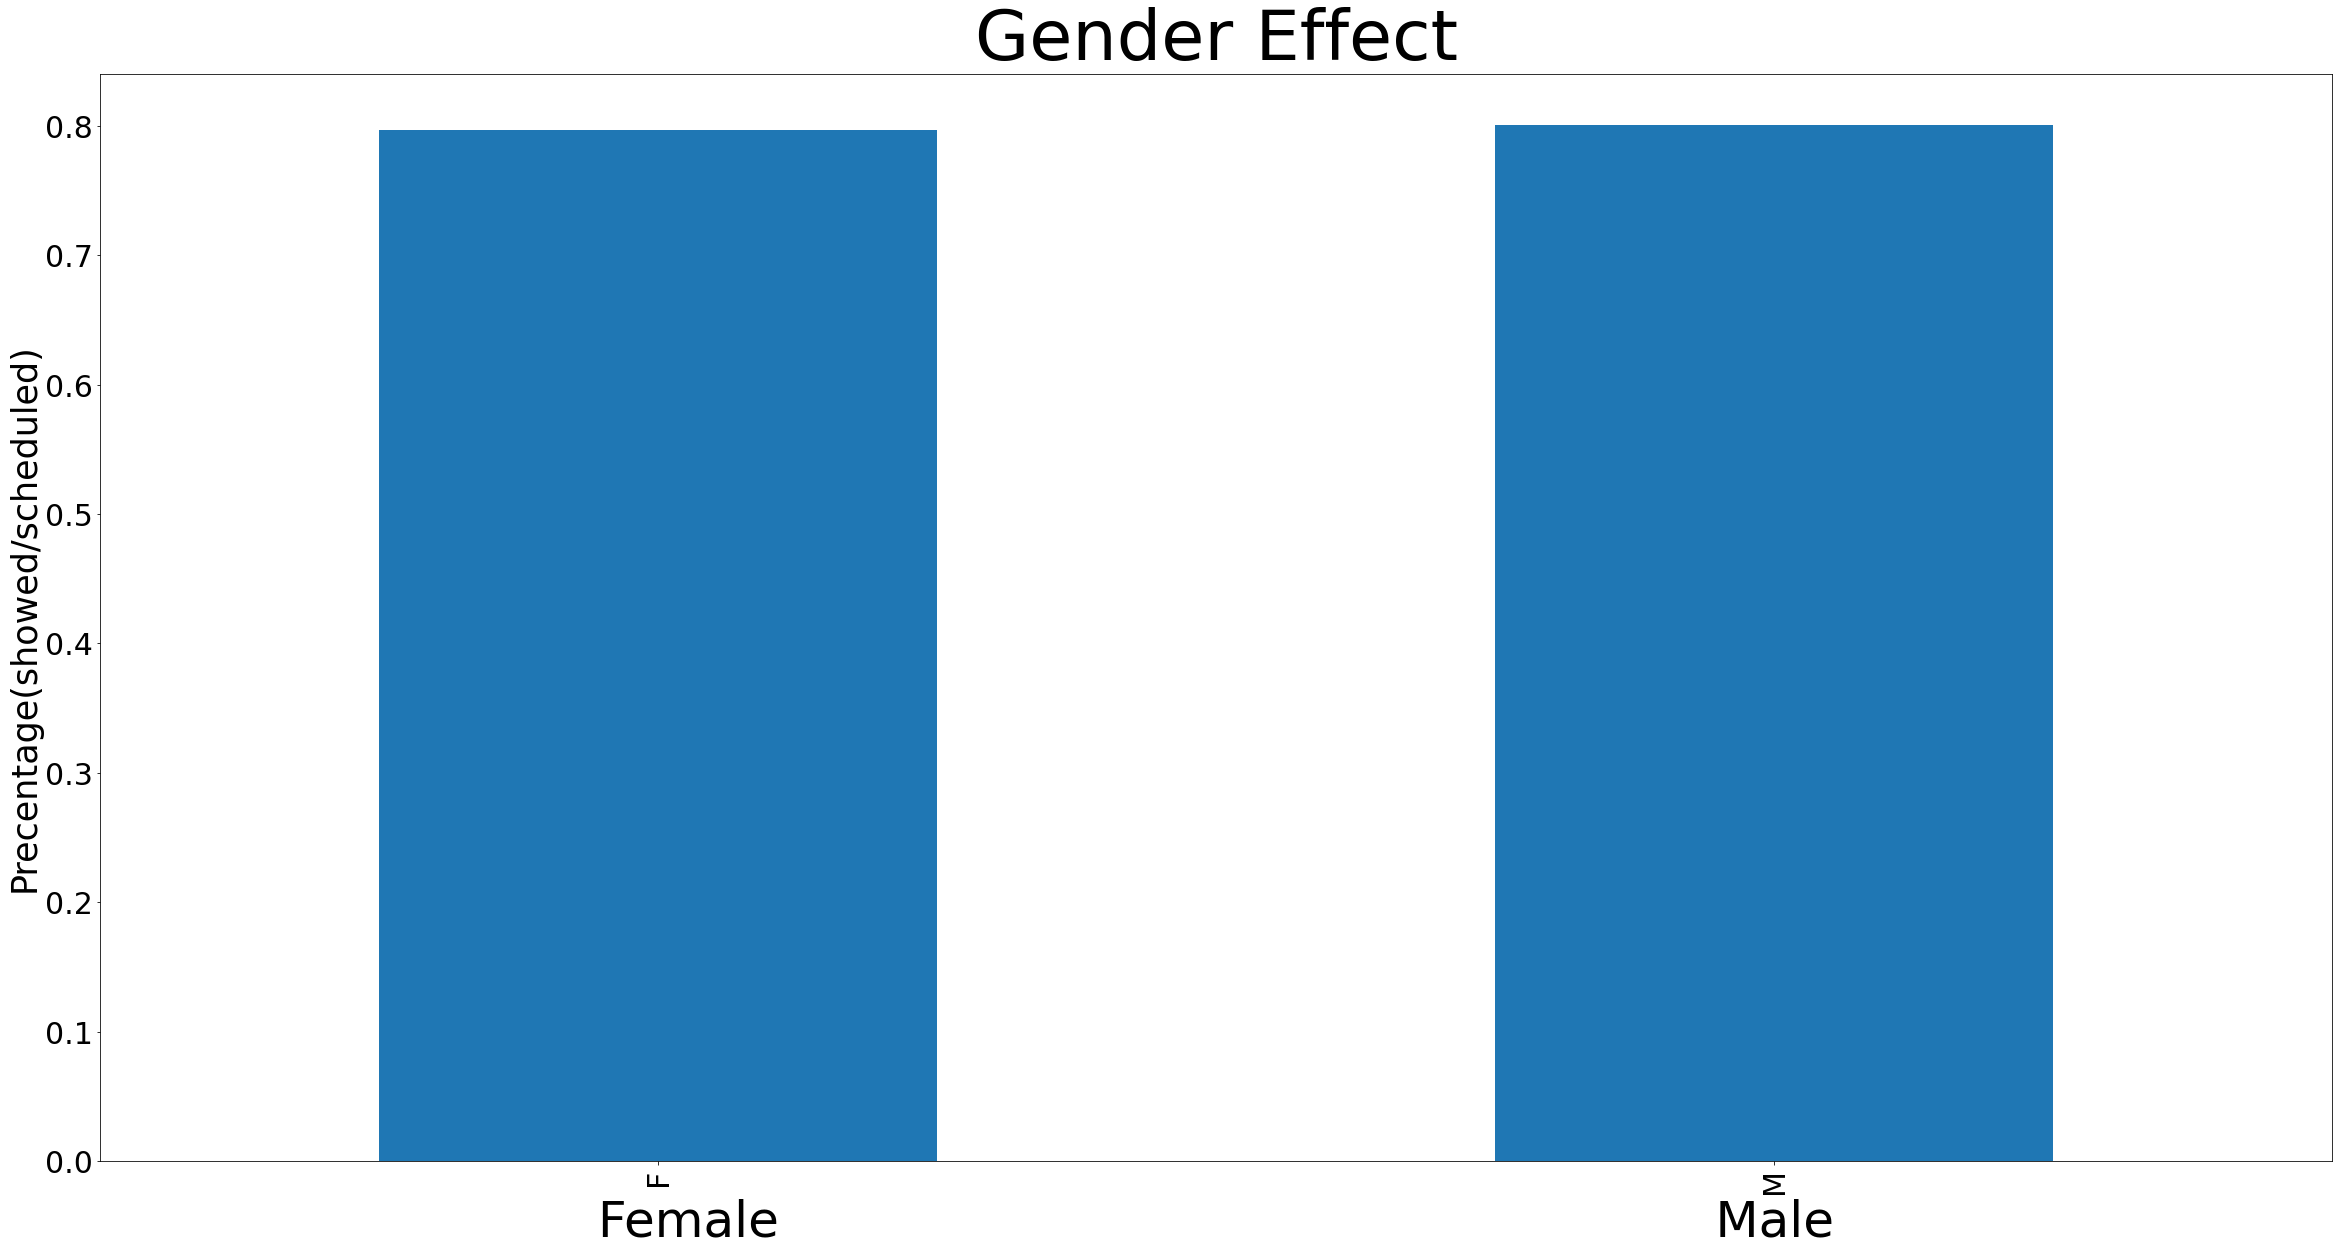

gender
F    0.796865
M    0.800305
Name: no_show, dtype: float64


In [21]:
#This figure show the ratio between how many people scheduled an appointment
# to how many actually have shown up for males and females
bar_graph('gender', 'Gender Effect', 'Female','Male' )

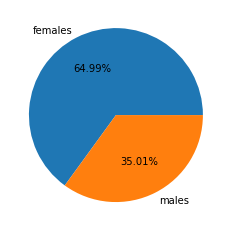


 Number of males and females who scheduled an appointment
F    71824
M    38684
Name: gender, dtype: int64 


 Number of males and females who showed up


gender
F    57234
M    30959
Name: no_show, dtype: int64

In [22]:
# The precentage of males and females of the patients scheduling a meeting
plt.pie(df.gender.value_counts(),autopct = '%0.2f%%', labels = ['females','males']);
plt.show()
#number of males and females who scheduled an appointment
print('\n Number of males and females who scheduled an appointment')
print(df.gender.value_counts(),'\n')
print('\n Number of males and females who showed up')
#number of males and females who showed up
df.groupby(['gender']).no_show.sum()

Although the males who showed up/ scheduled appointments are more than females, they're both almost have the same precentage of showing up to scheduling. The graphs show no effect of gender on showing up ratio

## Age

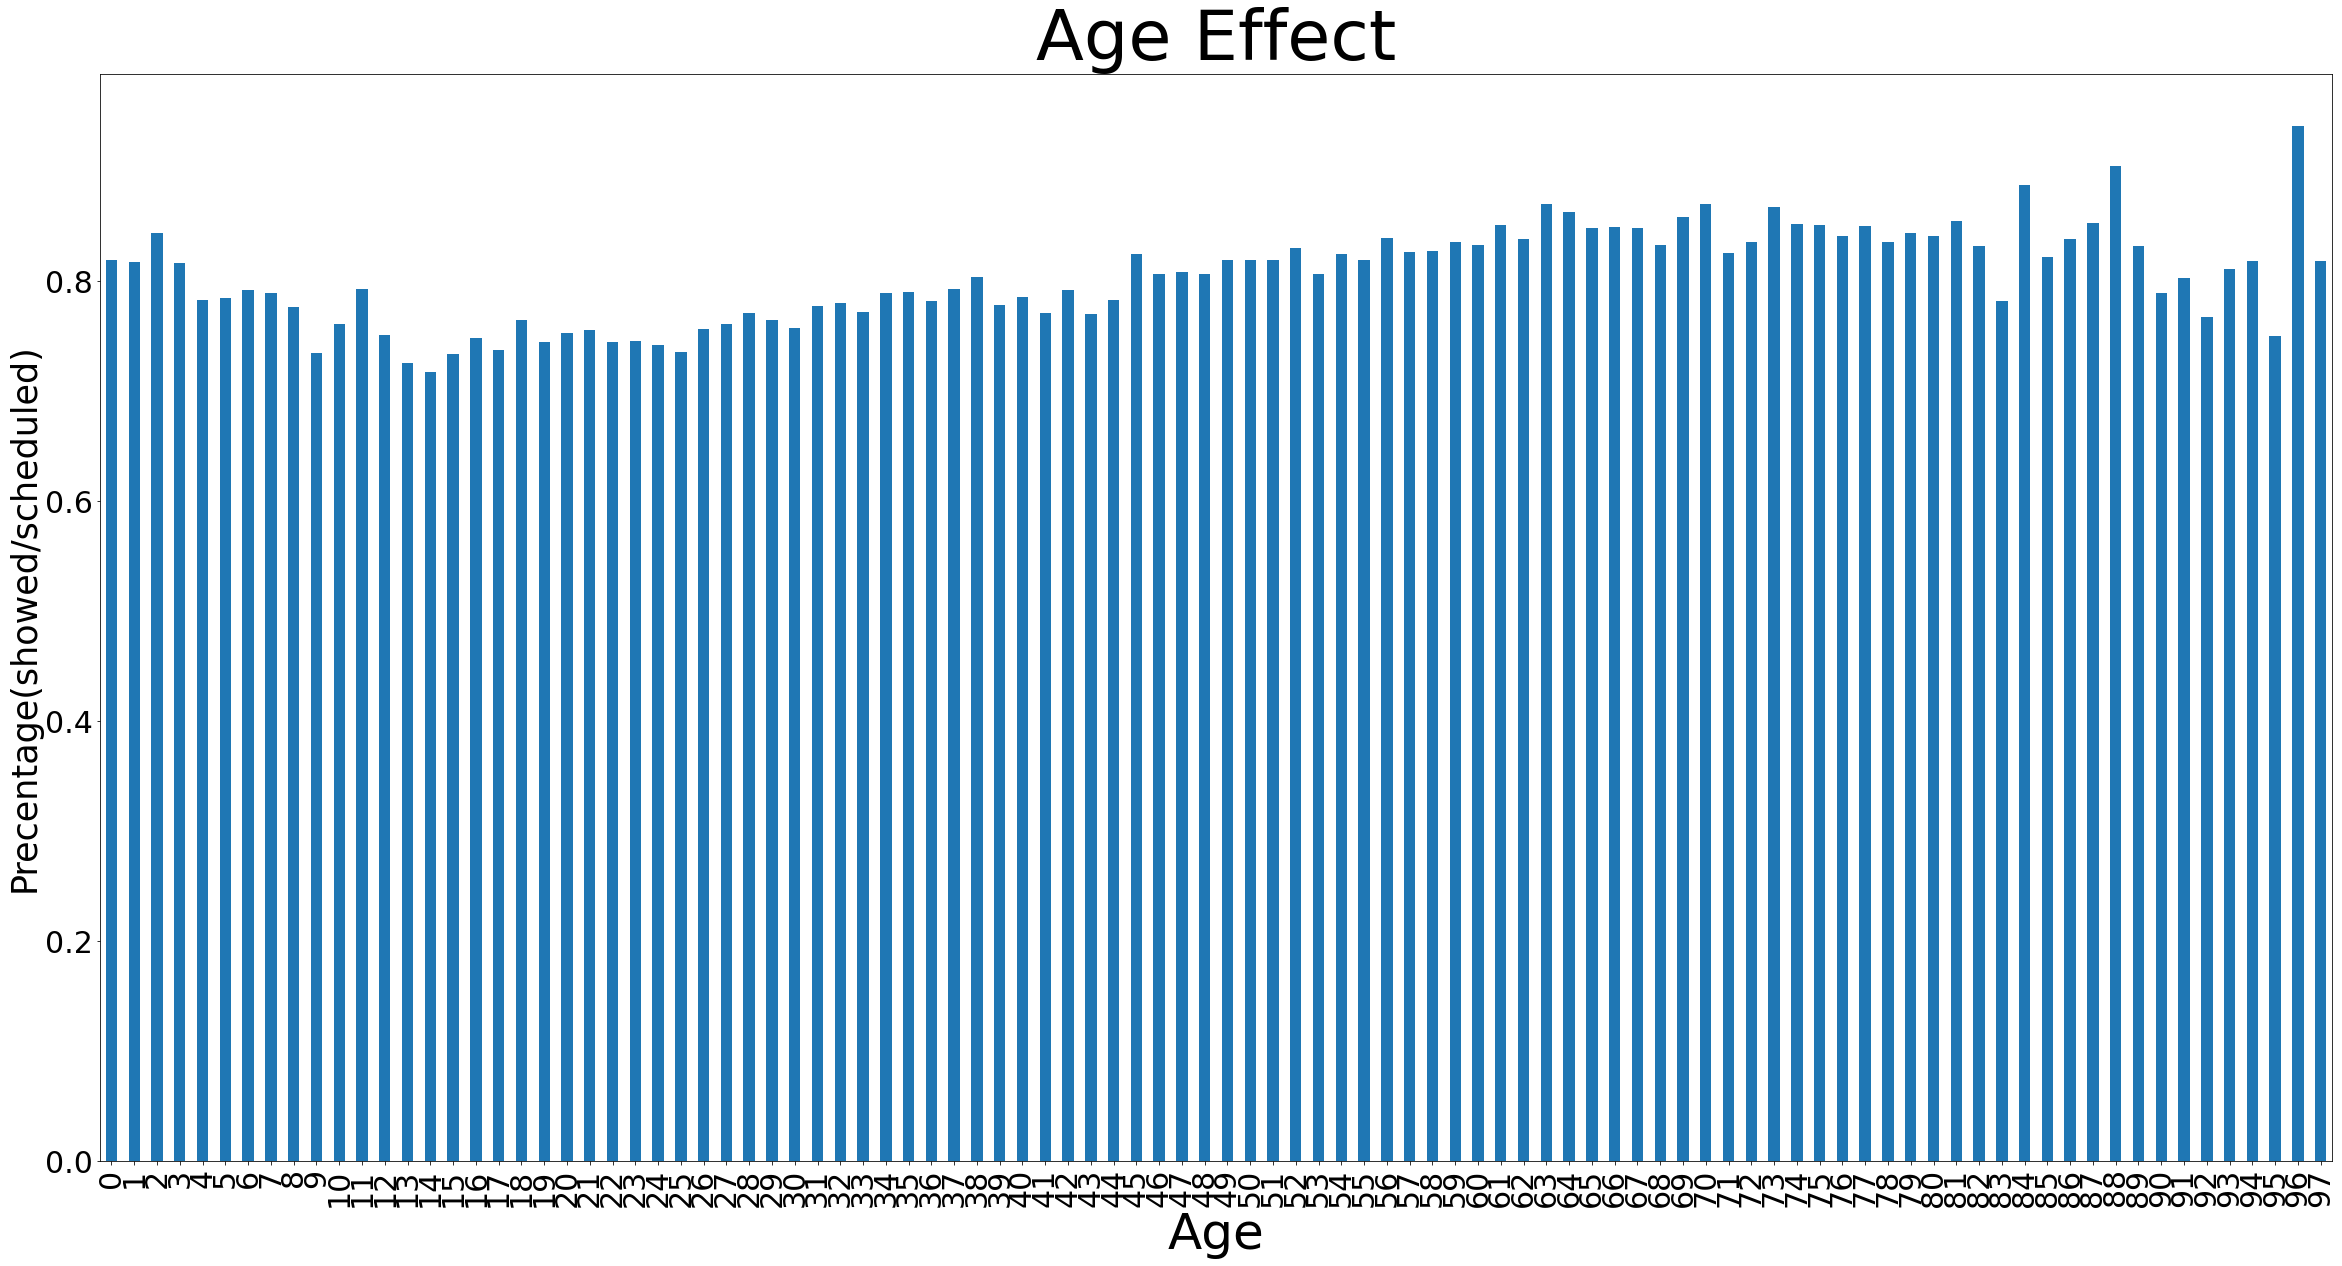

age
0     0.819441
1     0.817422
2     0.844252
3     0.816920
4     0.782910
        ...   
93    0.811321
94    0.818182
95    0.750000
96    0.941176
97    0.818182
Name: no_show, Length: 98, dtype: float64


In [23]:
#This figure show the ratio between how many people scheduled an appointment
# to how many actually have shown up for each signle given age
bar_graph('age', 'Age Effect', 'Age')

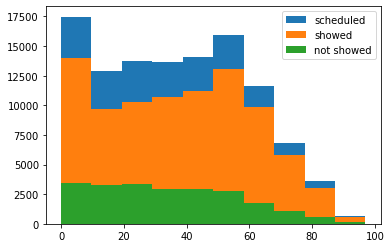

In [24]:
plt.hist(df.age, label = 'scheduled');
plt.hist(df.age[show],  label = 'showed');
plt.hist(df.age[not_show],  label = 'not showed');
plt.legend();

In [25]:
print(df.age.mean())
print(df.age[show].mean())
print(df.age[not_show].mean())

37.07837441633185
37.780368056421715
34.303965942191354


However, younger patients are the most patients scheduling and showing up, there's no direct relation between the age and the ratio between the scheduling and showing up. In other words, the graphs show no effect of the age on the precentage of showing up.

## Scholarship 

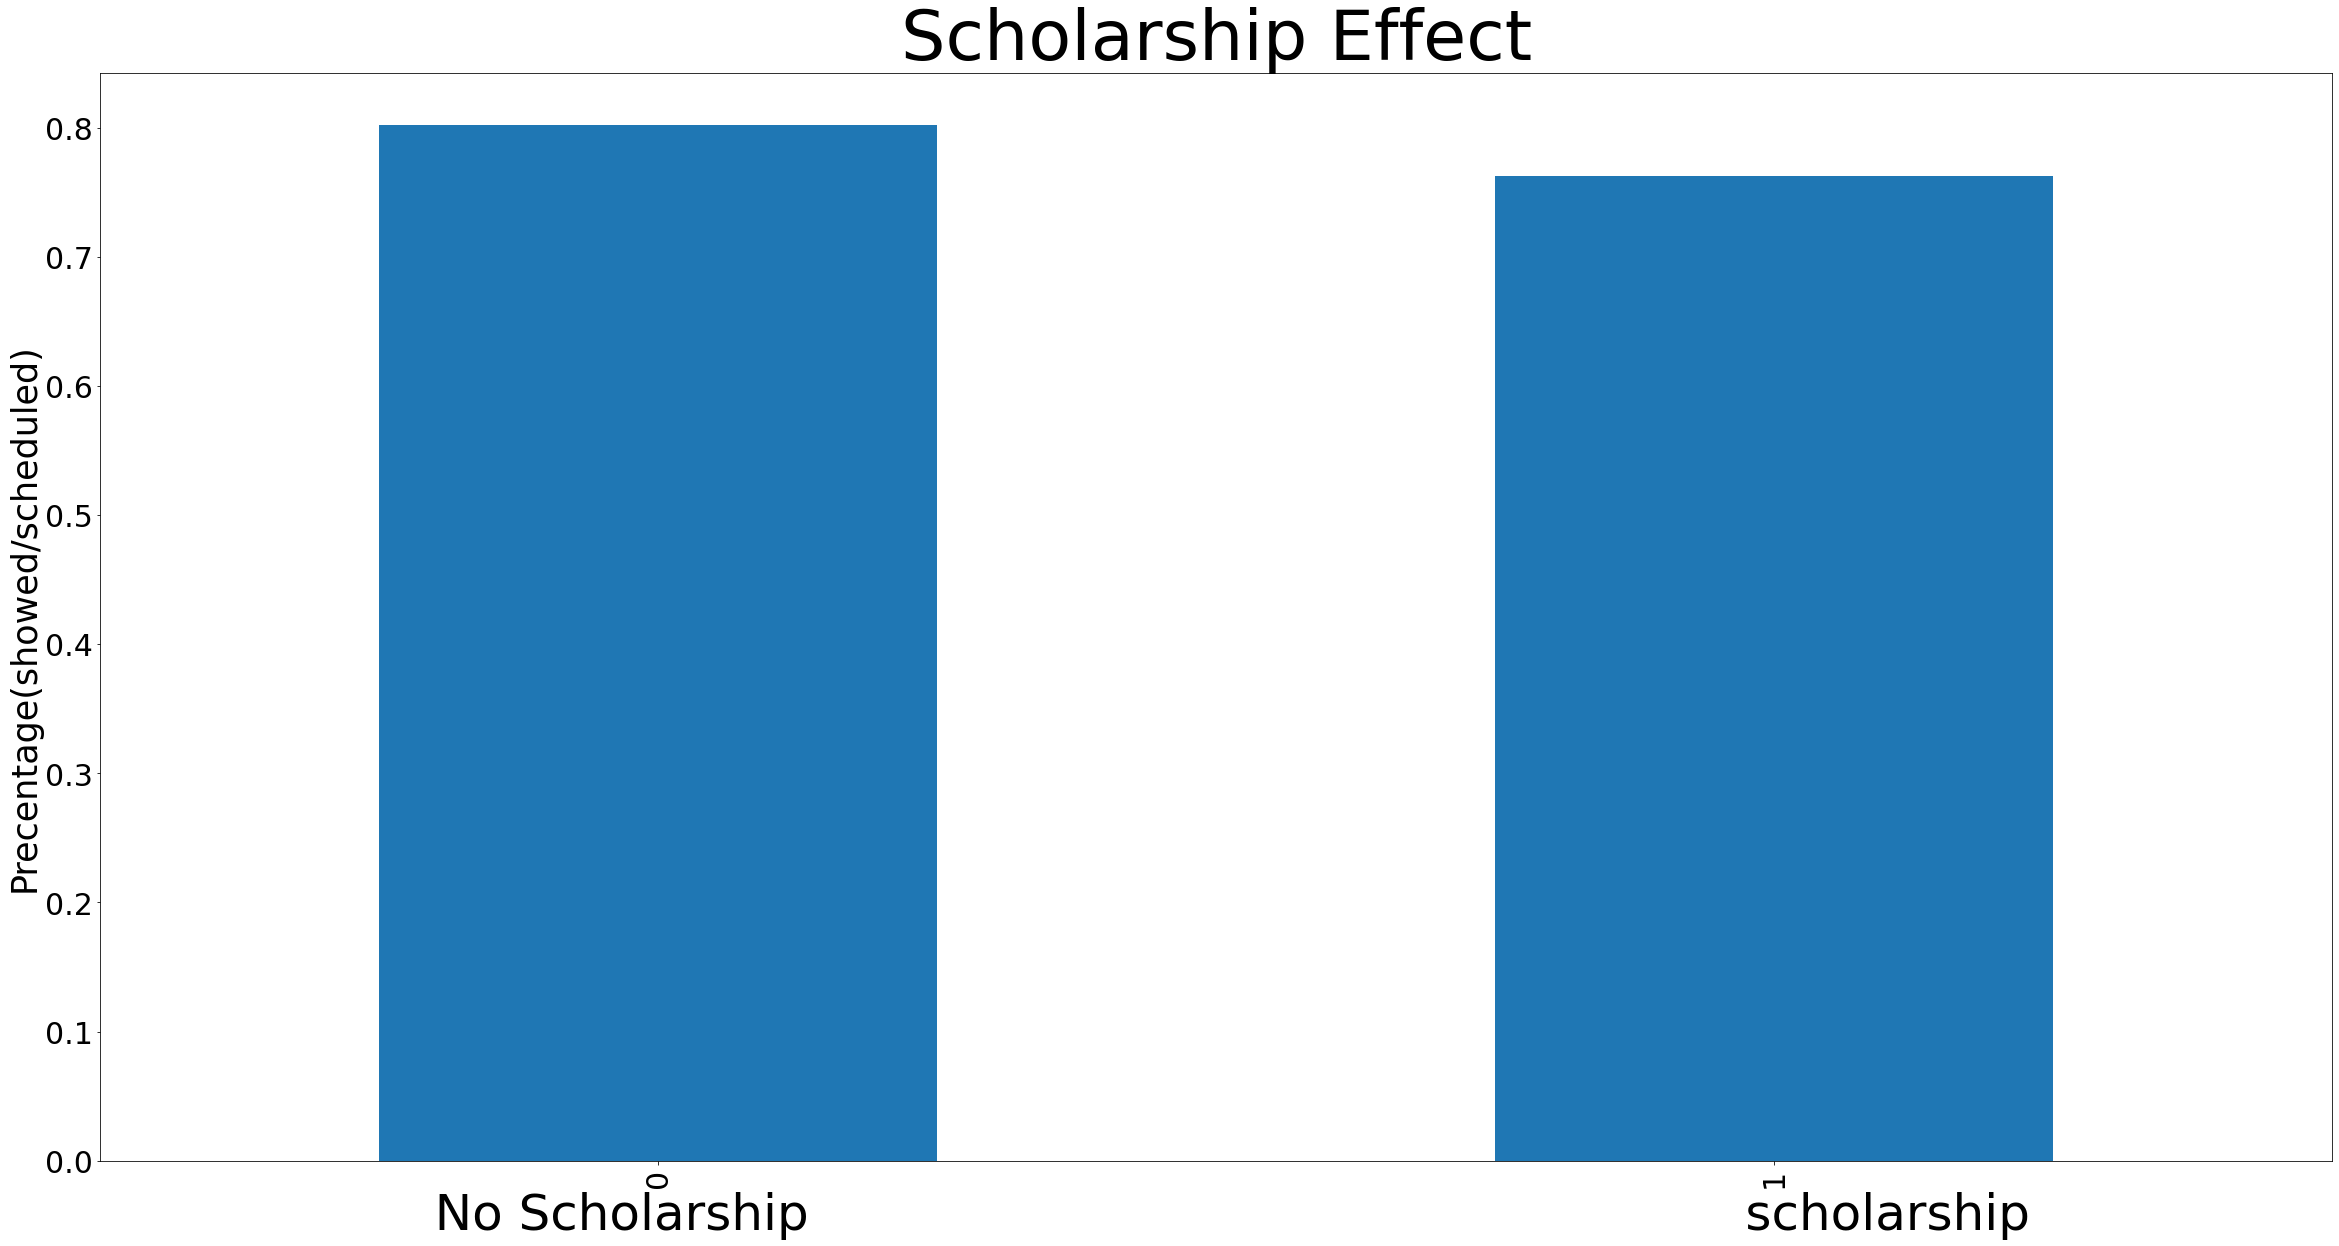

scholarship
0    0.801931
1    0.762637
Name: no_show, dtype: float64


In [26]:
#This figure show the ratio between how many patientd scheduled an appointment
# to how many actually have shown up for patients with and without scholarship
bar_graph('scholarship', 'Scholarship Effect', '  No Scholarship', 'scholarship')

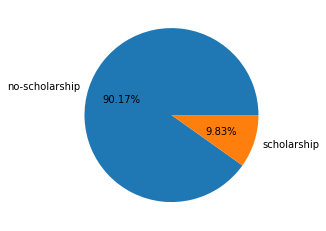


Number of patients with and without scholarship who scheduled an appointment
0    99647
1    10861
Name: scholarship, dtype: int64 


Number of patients with and without scholarship who showed up


scholarship
0    79910
1     8283
Name: no_show, dtype: int64

In [27]:
# The precentage of patients with and without scholarship scheduling a meeting
plt.pie(df.scholarship.value_counts(),autopct = '%0.2f%%', labels = ['no-scholarship','scholarship']);
plt.show()
#number of patients with and without scholarship who scheduled an appointment
print('\nNumber of patients with and without scholarship who scheduled an appointment')
print(df.scholarship.value_counts(),'\n')
print('\nNumber of patients with and without scholarship who showed up')
#Number of patients with and without scholarship who showed up
df.groupby(['scholarship']).no_show.sum()

However, Most of the patients (90%) have scholarship, there is only a slight difference in the ratio of the shown up to scheduled (4%).

## Hypertension

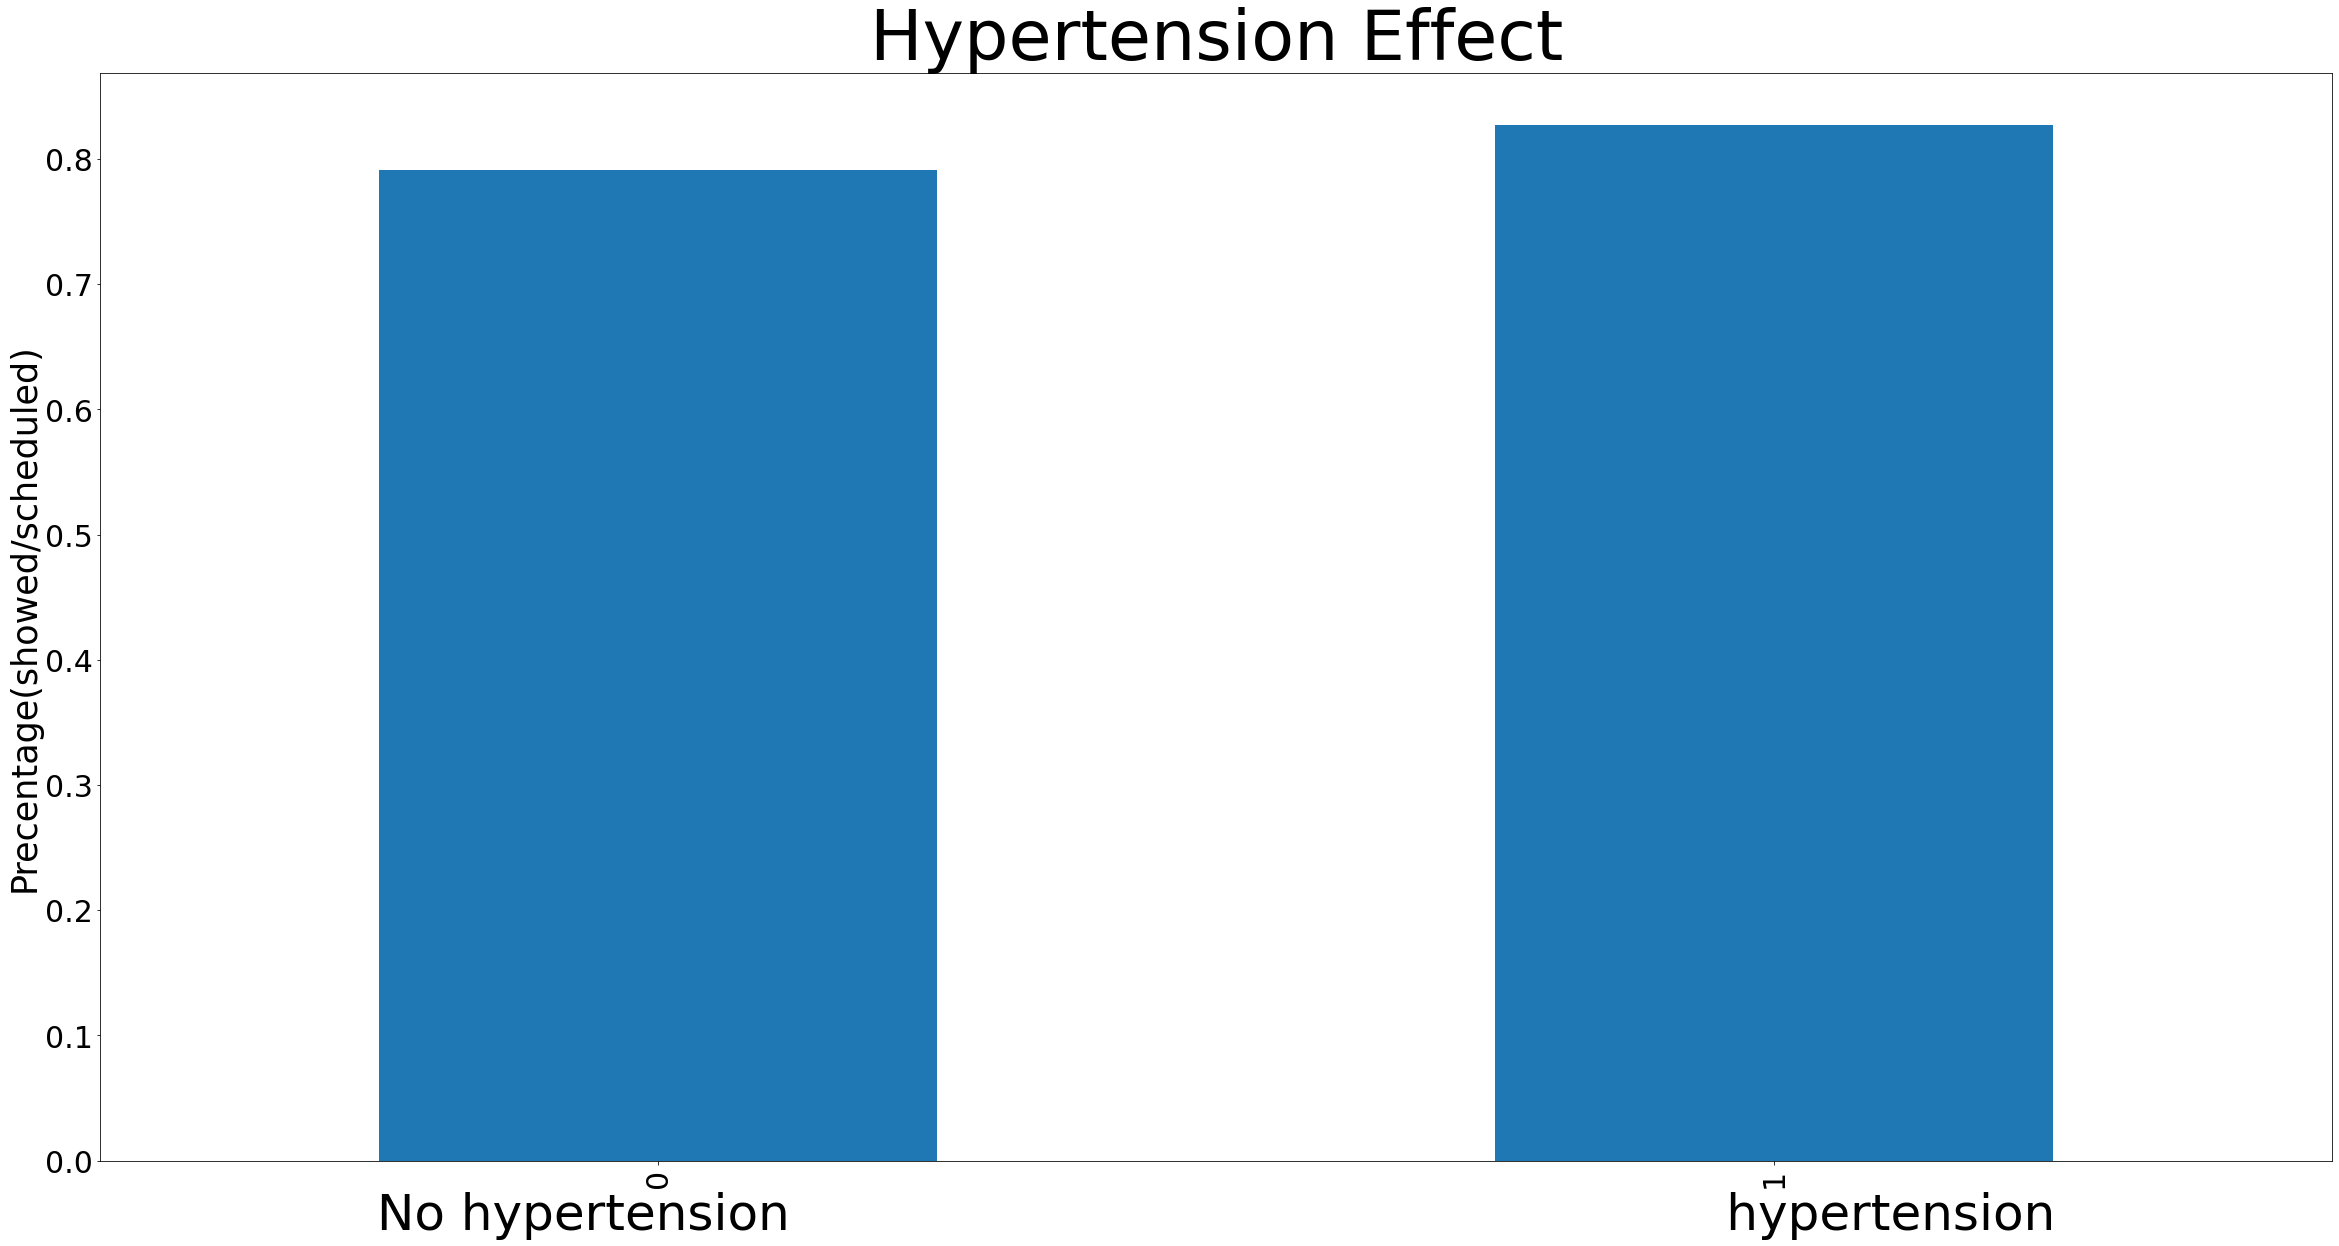

hypertension
0    0.790971
1    0.826963
Name: no_show, dtype: float64


In [28]:
#This figure show the ratio between how many people scheduled an appointment
# to how many actually have shown up for patients who have and don't have hypertension, seperately 
bar_graph('hypertension', 'Hypertension Effect', 'No hypertension', 'hypertension')

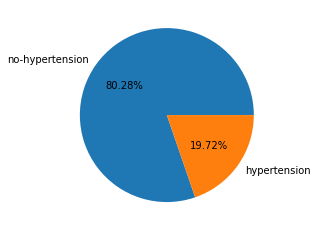


Number of patients with and without hypertension who scheduled an appointment
0    99647
1    10861
Name: scholarship, dtype: int64 


Number of patients with and without hypertension who showed up


hypertension
0    70171
1    18022
Name: no_show, dtype: int64

In [29]:
# The precentage of patients with and without hypertension scheduling a meeting
plt.pie(df.hypertension.value_counts(),autopct = '%0.2f%%', labels = ['no-hypertension','hypertension']);
plt.show()
#number of patients with and without hypertension who scheduled an appointment
print('\nNumber of patients with and without hypertension who scheduled an appointment')
print(df.scholarship.value_counts(),'\n')
print('\nNumber of patients with and without hypertension who showed up')
#Number of patients with and without hypertension who showed up
df.groupby(['hypertension']).no_show.sum()

## Diabetes

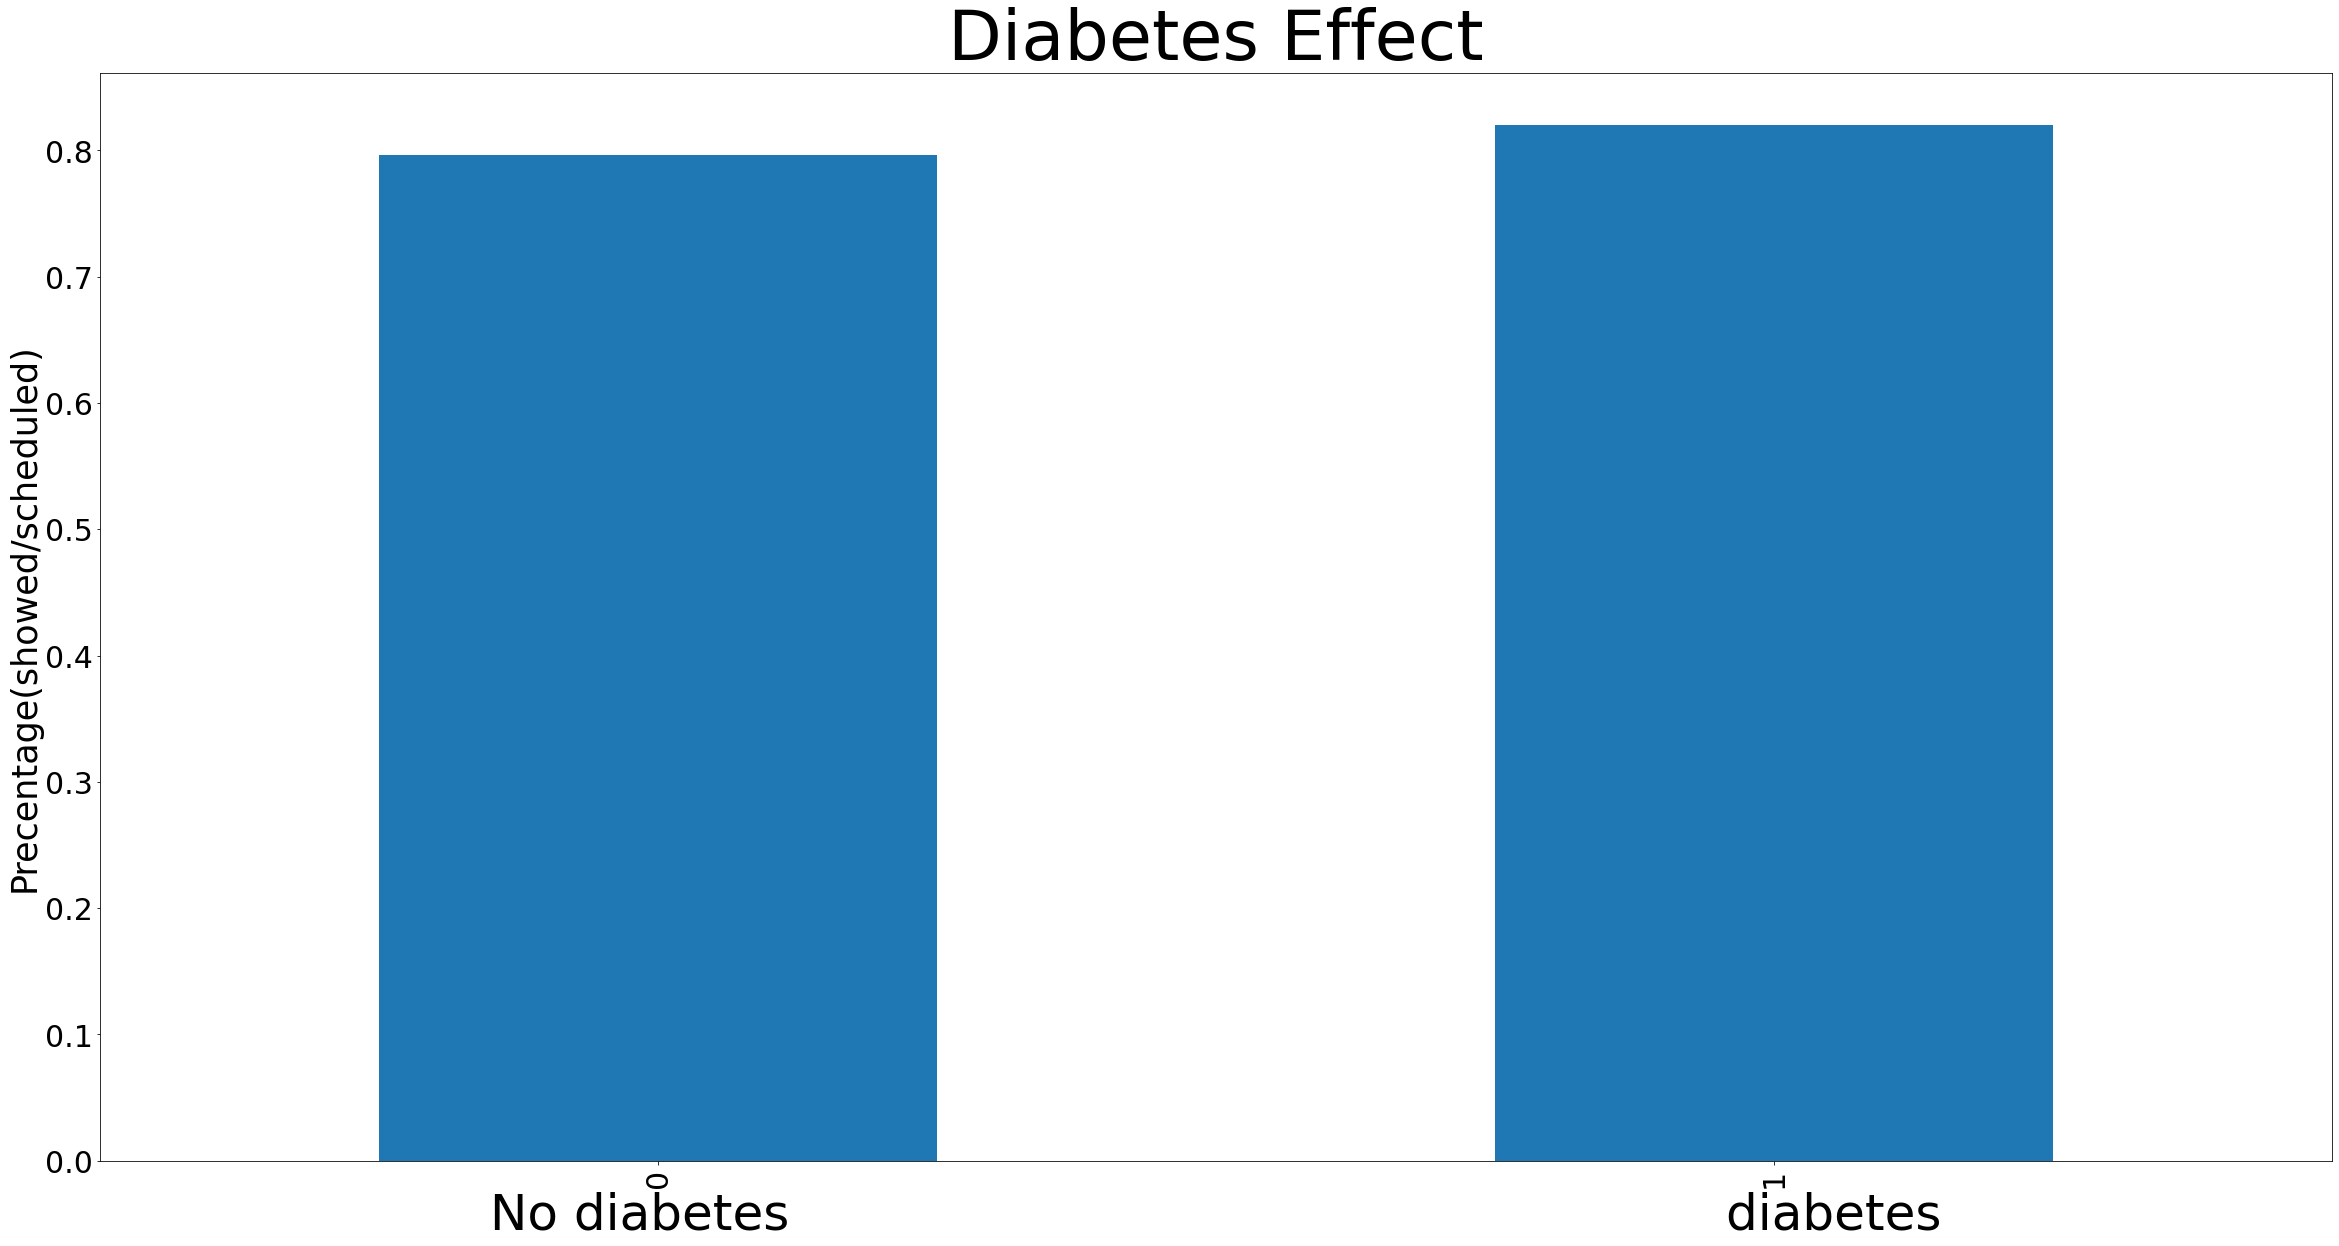

diabetes
0    0.796379
1    0.819899
Name: no_show, dtype: float64


In [30]:
#This figure show the ratio between how many people scheduled an appointment
# to how many actually have shown up for patients who suffer from diabetes
#and patients who don't
bar_graph('diabetes', 'Diabetes Effect', 'No diabetes', 'diabetes')

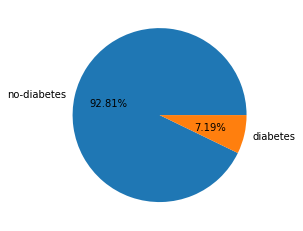


Number of patients with and without diabetes who scheduled an appointment
0    102568
1      7940
Name: diabetes, dtype: int64 


Number of patients with and without diabetes who showed up


diabetes
0    81683
1     6510
Name: no_show, dtype: int64

In [31]:
# The precentage of patients with and without diabetes scheduling a meeting
plt.pie(df.diabetes.value_counts(),autopct = '%0.2f%%', labels = ['no-diabetes','diabetes']);
plt.show()
#number of patients with and without diabetes who scheduled an appointment
print('\nNumber of patients with and without diabetes who scheduled an appointment')
print(df.diabetes.value_counts(),'\n')
print('\nNumber of patients with and without diabetes who showed up')
#Number of patients with and without diabetes who showed up
df.groupby(['diabetes']).no_show.sum()

However, Most of the patients (93%) don't have diabetes, there is only a slight difference in the ratio of the shown up to scheduled (2%).

## Alcoholism

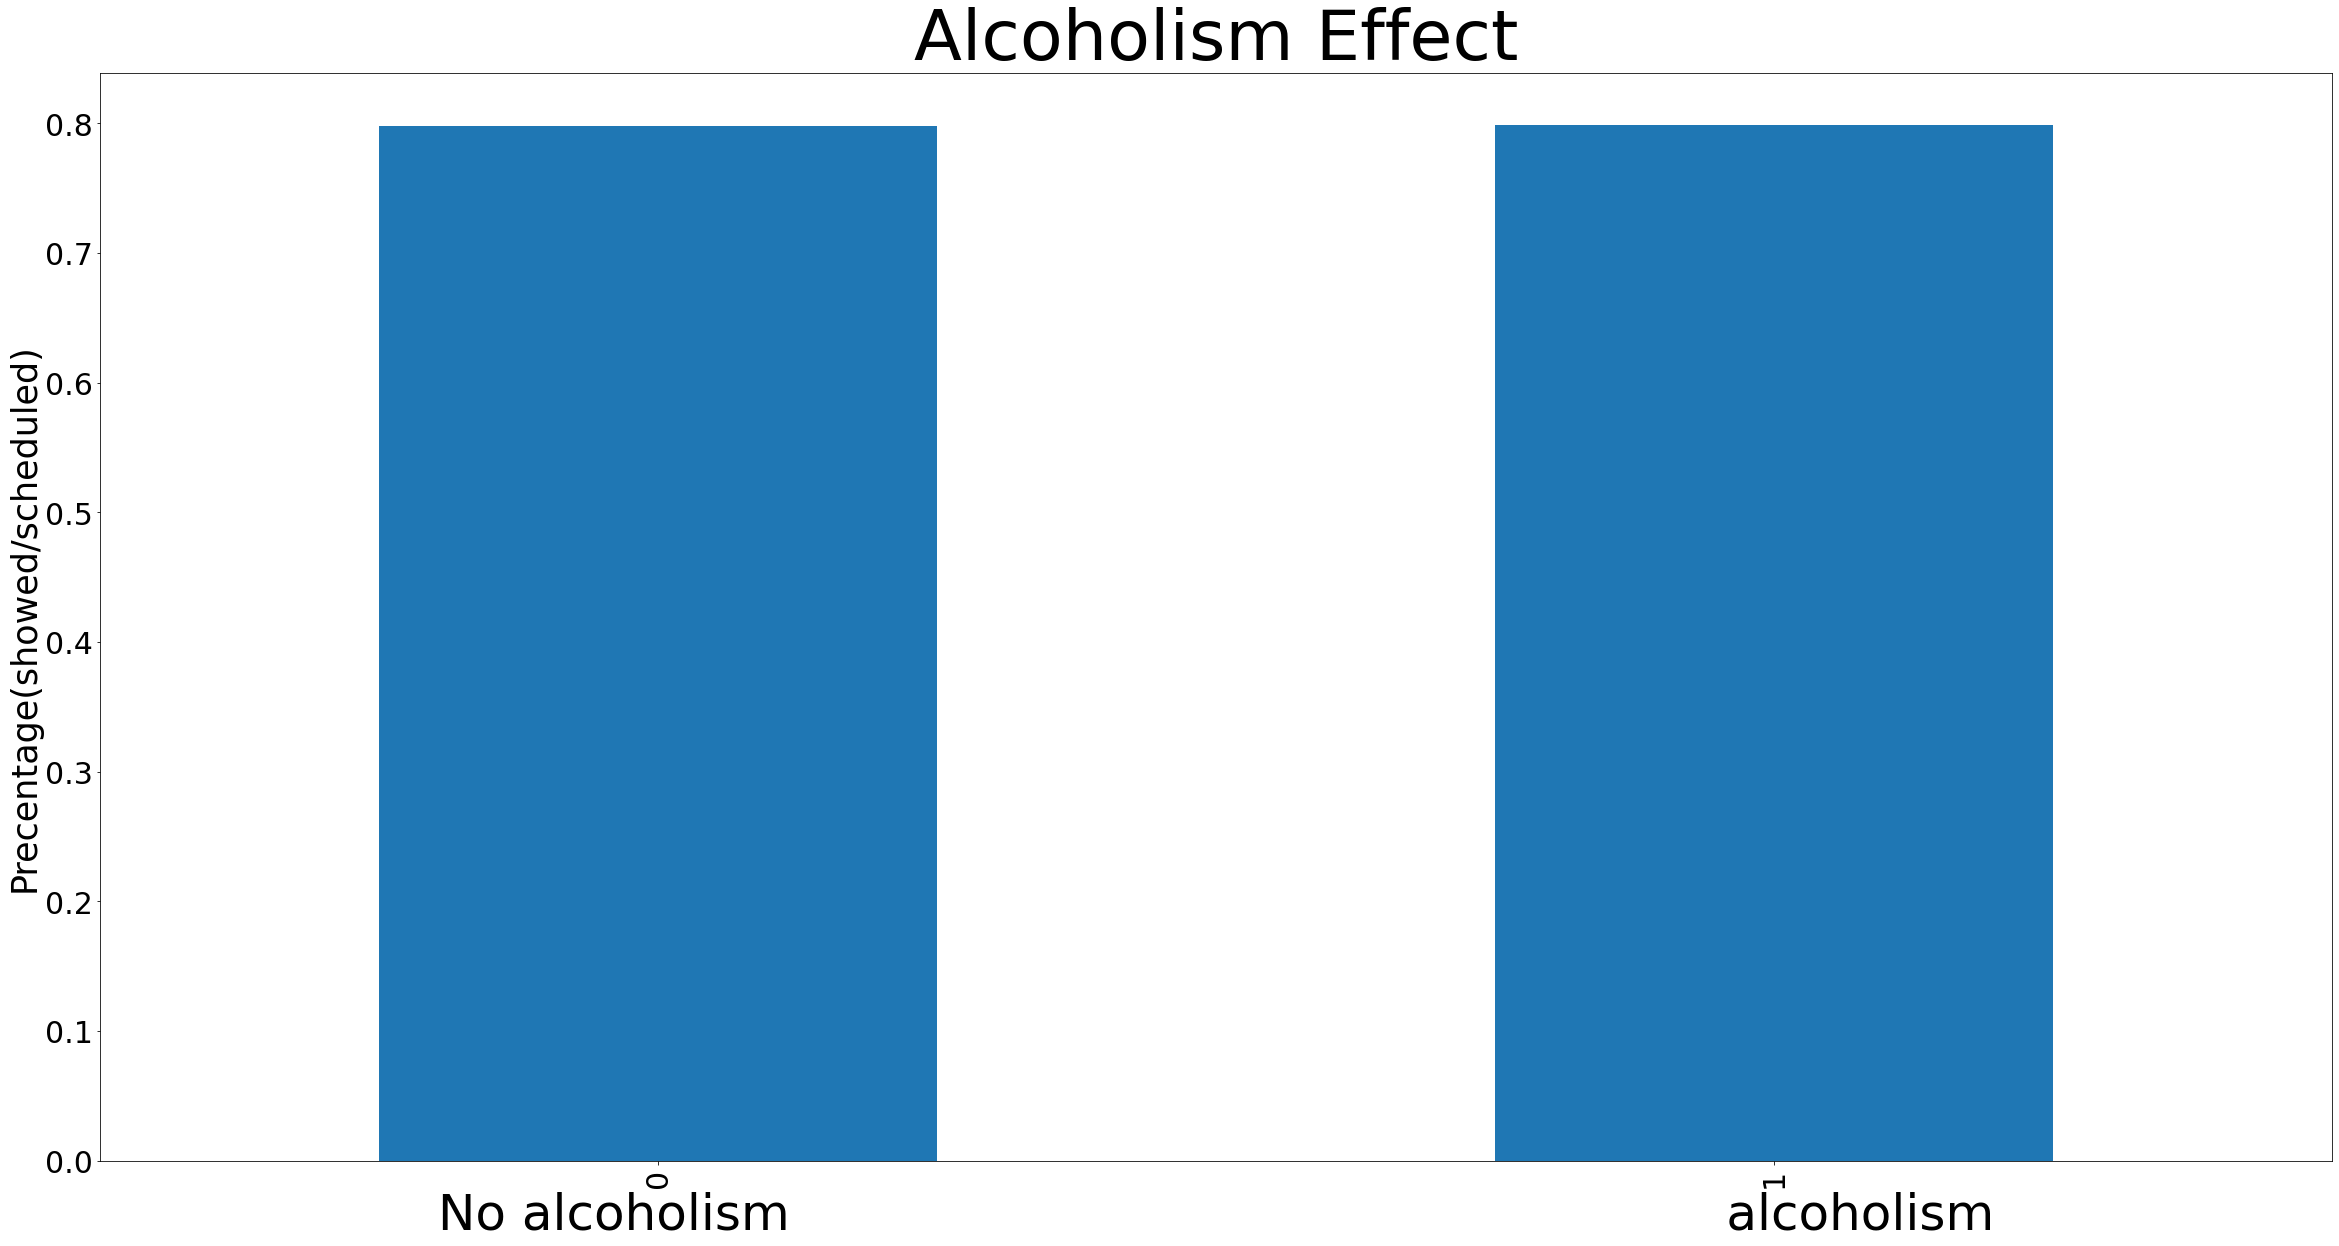

alcoholism
0    0.798055
1    0.798512
Name: no_show, dtype: float64


In [32]:
#This figure show the ratio between how many people scheduled an appointment
# to how many actually have shown up for patients who suffer from alcoholism
#and patients who don't
bar_graph('alcoholism', 'Alcoholism Effect', 'No alcoholism', 'alcoholism')

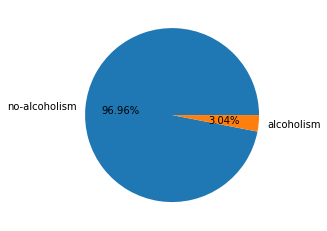


Number of patients with and without alcoholism who scheduled an appointment
0    107148
1      3360
Name: alcoholism, dtype: int64 


Number of patients with and without alcoholism who showed up


alcoholism
0    85510
1     2683
Name: no_show, dtype: int64

In [33]:
# The precentage of patients with and without alcoholism scheduling a meeting
plt.pie(df.alcoholism.value_counts(),autopct = '%0.2f%%', labels = ['no-alcoholism','alcoholism']);
plt.show()
#number of patients with and without alcoholism who scheduled an appointment
print('\nNumber of patients with and without alcoholism who scheduled an appointment')
print(df.alcoholism.value_counts(),'\n')
print('\nNumber of patients with and without alcoholism who showed up')
#Number of patients with and without alcoholism who showed up
df.groupby(['alcoholism']).no_show.sum()

Most of the patients don't have alcoholism. However, both patients who do or don't have alcoholism have the same precentage of showing up

## Handicap

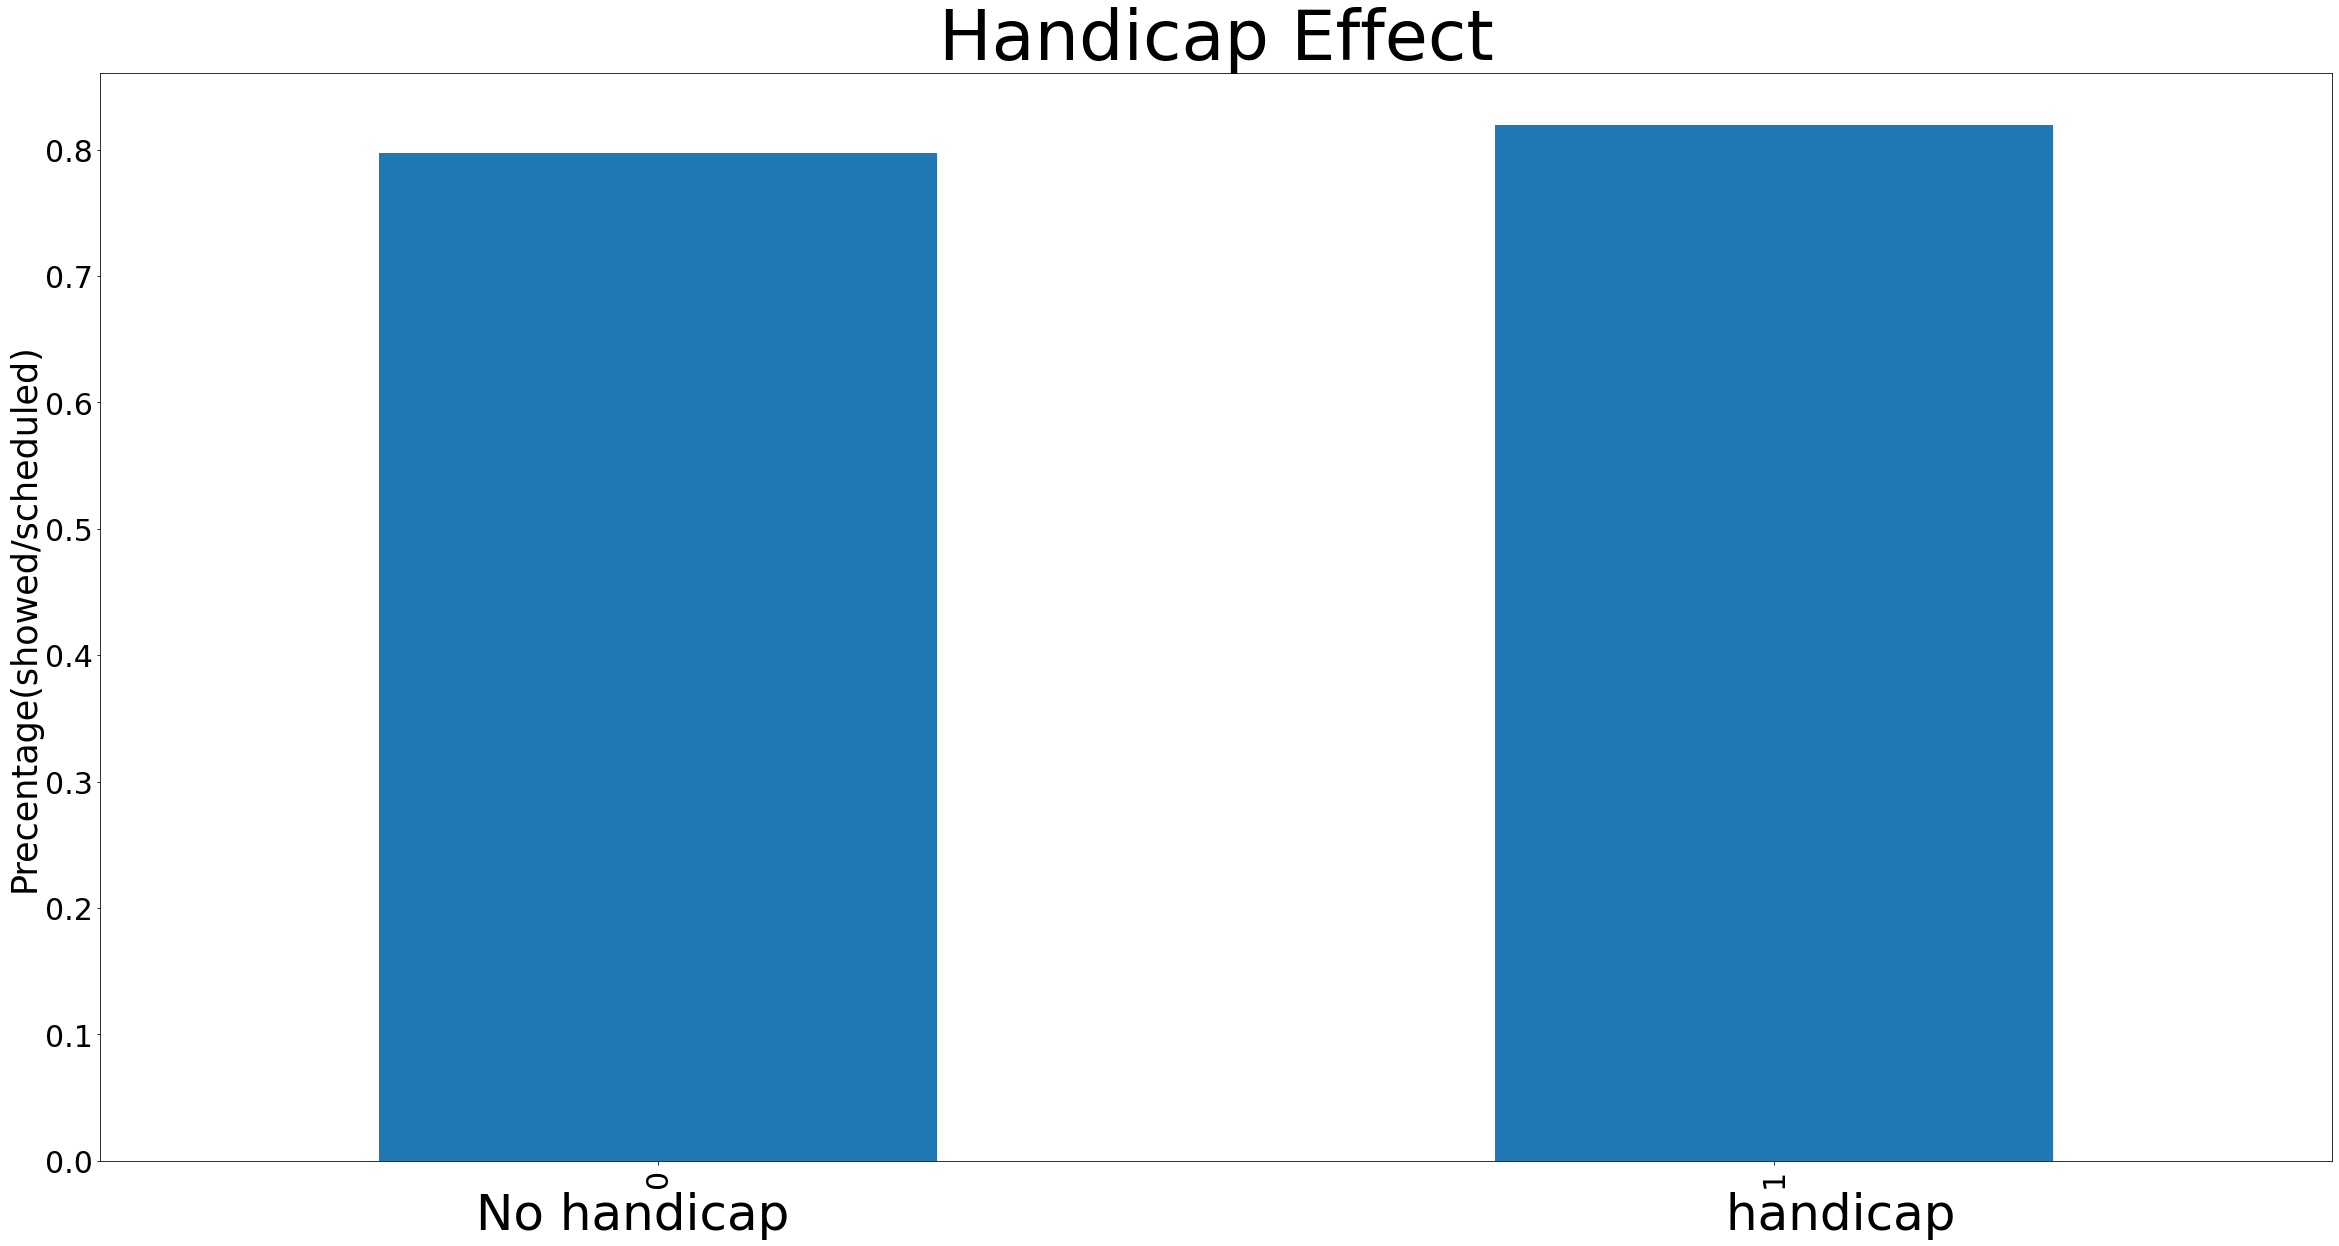

handicap
0    0.797632
1    0.819239
Name: no_show, dtype: float64


In [34]:
#This figure show the ratio between how many people scheduled an appointment
# to how many actually have shown up for patients who suffer from a handicap
#and patients who don't
bar_graph('handicap', 'Handicap Effect', 'No handicap', 'handicap')

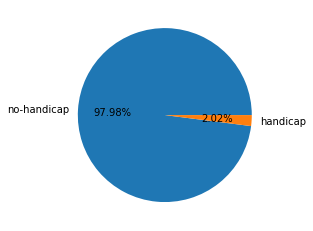


Number of patients with and without handicap who scheduled an appointment
0    108273
1      2235
Name: handicap, dtype: int64 


Number of patients with and without handicap who showed up


handicap
0    86362
1     1831
Name: no_show, dtype: int64

In [35]:
# The precentage of patients with and without handicap scheduling a meeting
plt.pie(df.handicap.value_counts(),autopct = '%0.2f%%', labels = ['no-handicap','handicap']);
plt.show()
#number of patients with and without handicap who scheduled an appointment
print('\nNumber of patients with and without handicap who scheduled an appointment')
print(df.handicap.value_counts(),'\n')
print('\nNumber of patients with and without handicap who showed up')
#Number of patients with and without handicap who showed up
df.groupby(['handicap']).no_show.sum()

However, Most of the patients (98%) don't have handicap, there is only a slight difference in the ratio of the shown up to scheduled (2%).

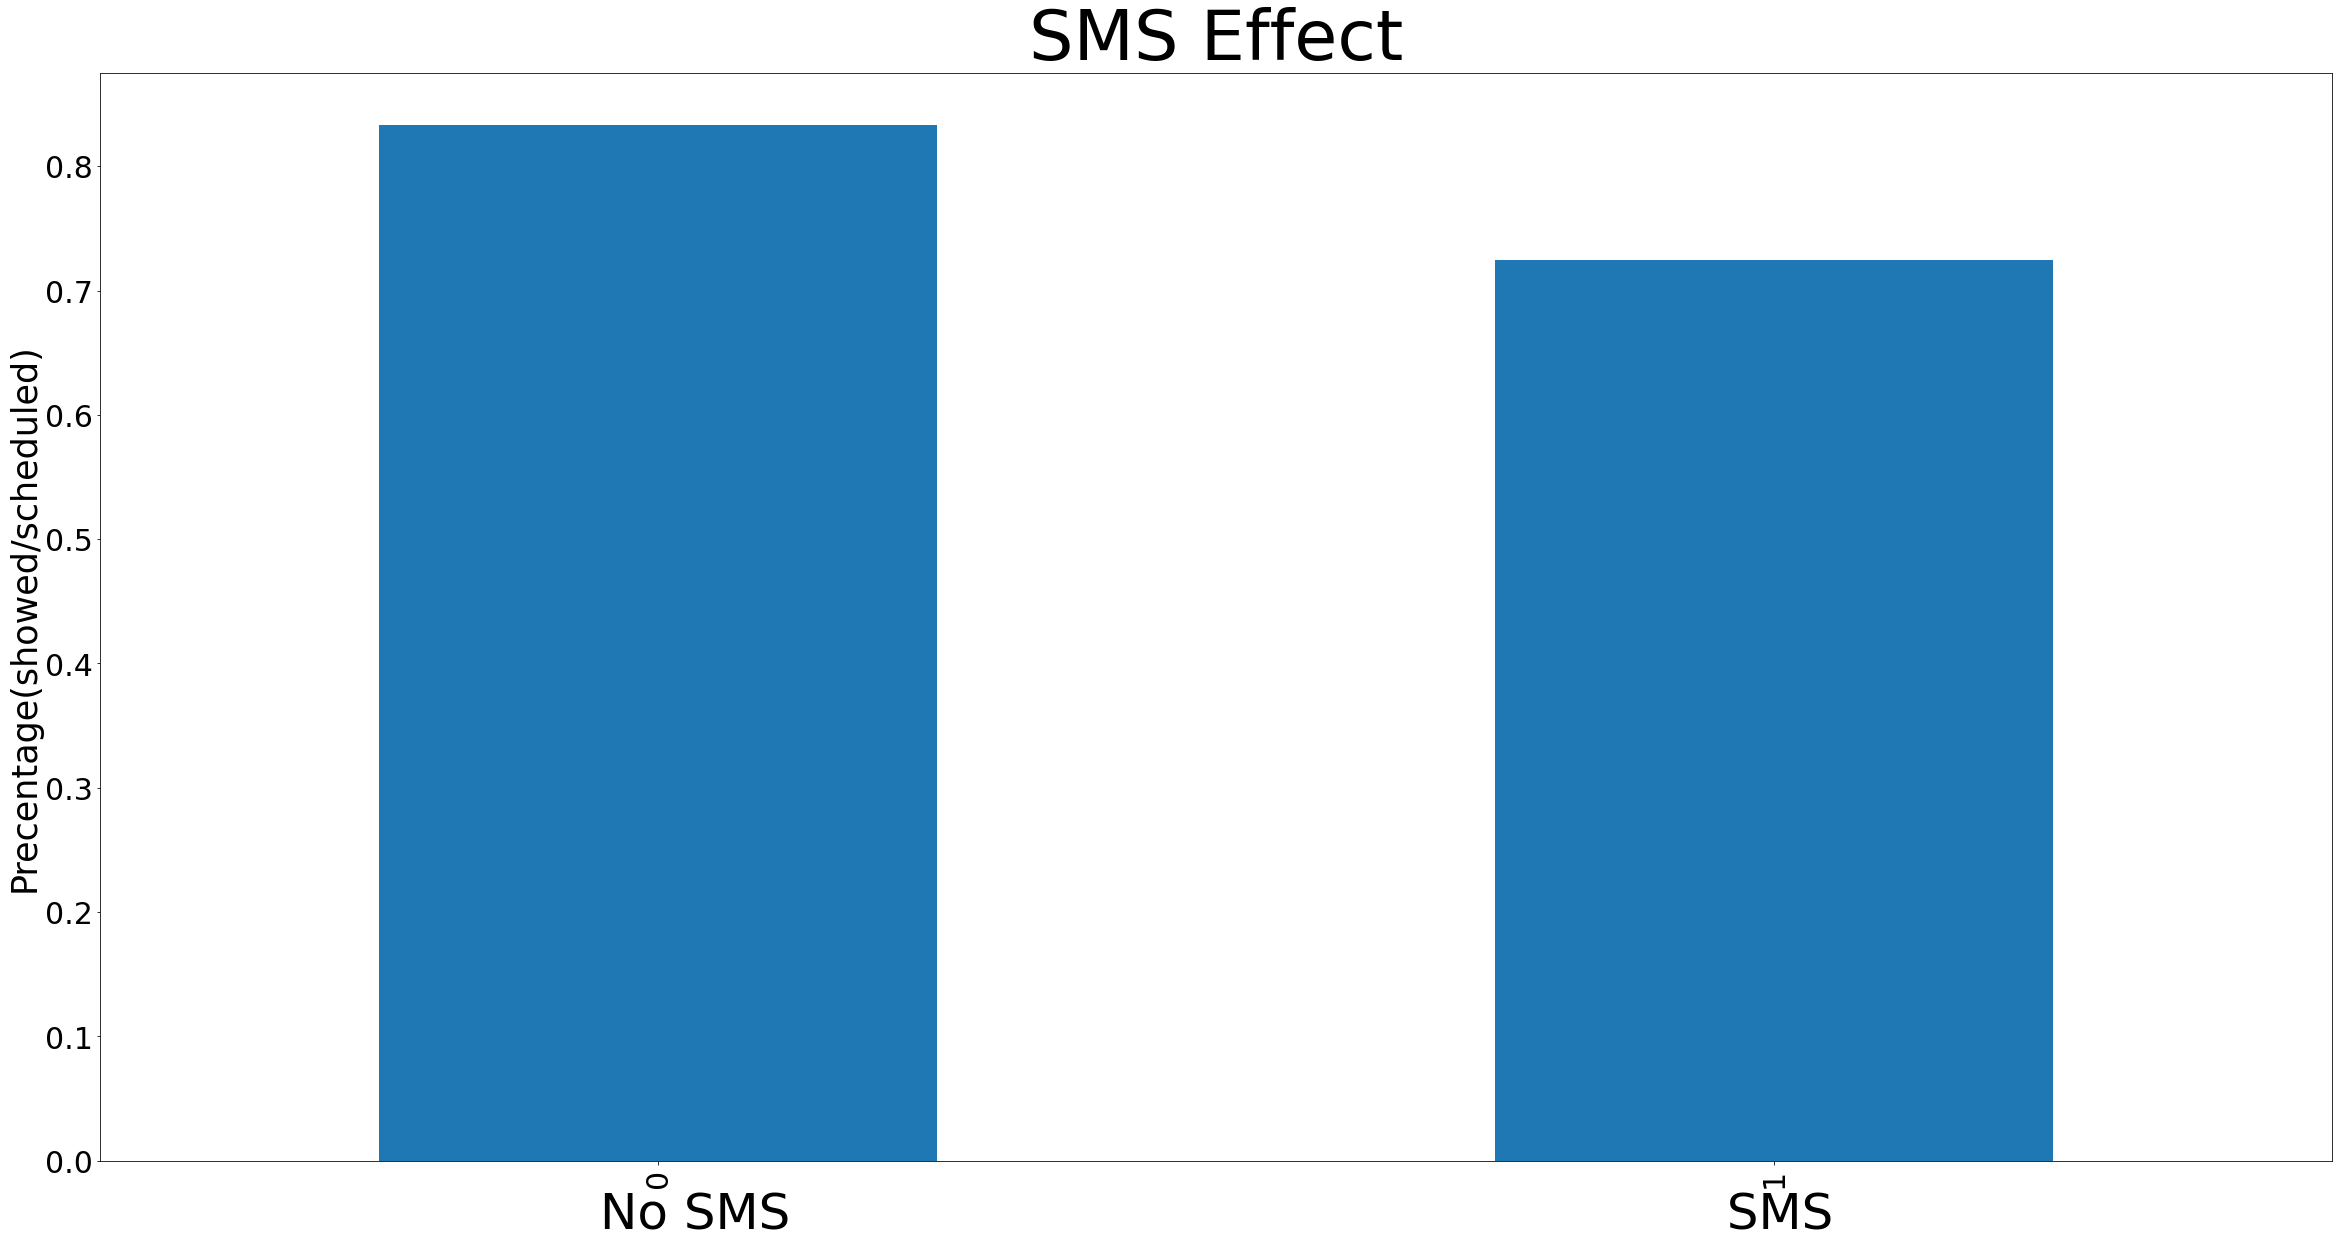

sms_received
0    0.832987
1    0.724223
Name: no_show, dtype: float64


In [36]:
#This figure show the ratio between how many people scheduled an appointment
# to how many actually have shown up for patients who 
#did and didn't receive a sms message
bar_graph('sms_received', 'SMS Effect', 'No SMS', 'SMS')

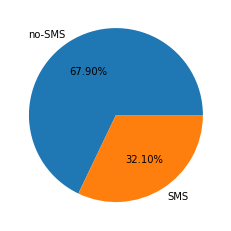


Number of patients received and didn't receive an sms who scheduled an appointment
0    75030
1    35478
Name: sms_received, dtype: int64 


Number of patients received and didn't receive an sms who showed up


sms_received
0    62499
1    25694
Name: no_show, dtype: int64

In [37]:
# The precentage of patients received and didn\'t receive an sms who scheduled an appointment
plt.pie(df.sms_received.value_counts(),autopct = '%0.2f%%', labels = ['no-SMS','SMS']);
plt.show()
#number of patients received and didn\'t receive an sms who scheduled an appointment
print('\nNumber of patients received and didn\'t receive an sms who scheduled an appointment')
print(df.sms_received.value_counts(),'\n')
print('\nNumber of patients received and didn\'t receive an sms who showed up')
#Number of patients received and didn\'t receive an sms who showed up
df.groupby(['sms_received']).no_show.sum()

The bar graph show that the showing up precentge of patients who did not received and sms message is higher than of those who received by 10%

## Time period

In [38]:
#converting time in both scheduled_day and appointment_day columns
#from strings to date time, so I can calculated the number of days between them.
df.scheduled_day = pd.to_datetime(df.scheduled_day)
df.appointment_day = pd.to_datetime(df.appointment_day)

#making new columns for day, months and year for both coulmns

df['sch_year'] = df.scheduled_day.dt.year
df['sch_month'] = df.scheduled_day.dt.month
df['sch_day'] = df.scheduled_day.dt.day

df['app_year'] = df.appointment_day.dt.year
df['app_month'] = df.appointment_day.dt.month
df['app_day'] = df.appointment_day.dt.day


In [39]:
print(df.sch_year.value_counts(), '\n',df.app_year.value_counts())

2016    110446
2015        62
Name: sch_year, dtype: int64 
 2016    110508
Name: app_year, dtype: int64


There's a problem here, since the scheduled year have two years (2015 & 2016) if we calculated the difference between the years using the method above, we may find 1 year difference. However the acutal difference might be less if the schedule date is (11/2015) and appointment date is (4/2016) for example. Therefore, I will use a reference date (1/1/2015) and calculate the number of days starting then for both columns using the new columns I created using the below formula

In [40]:
df['total_app_days'] = (365*(df.app_year-2015)+30*(df.app_month)+df.app_day)
df['total_sch_days'] = (365*(df.sch_year-2015)+30*(df.sch_month)+df.sch_day)

#the above two new columns have the total number of days from (1/1/2015) 
# the the appointment and scheduled days, respectively

# Now, calculating the difference in days between scheduling and appointment

df['delta_days'] = (df.total_app_days)-(df.total_sch_days)

In [41]:
#checking the validity of the values in the new colum
print(df.delta_days.value_counts())
print('\n',df.delta_days.describe())

0      38825
1       6075
2       6018
4       5094
7       4825
       ...  
104        1
100        1
126        1
101        1
122        1
Name: delta_days, Length: 135, dtype: int64

 count    110508.000000
mean         10.036459
std          15.097234
min          -6.000000
25%           0.000000
50%           4.000000
75%          14.000000
max         181.000000
Name: delta_days, dtype: float64


In [42]:
# There are some values less than (0) which isn't possible, I will check them 
#then delete them 
df.loc[df['delta_days']<0]

# only 5 values. now, delete them.

df = df.loc[df['delta_days']>=0]

In [43]:
df.delta_days

0          0
1          0
2          0
3          0
4          0
          ..
110522    34
110523    34
110524    40
110525    40
110526    40
Name: delta_days, Length: 110503, dtype: int64

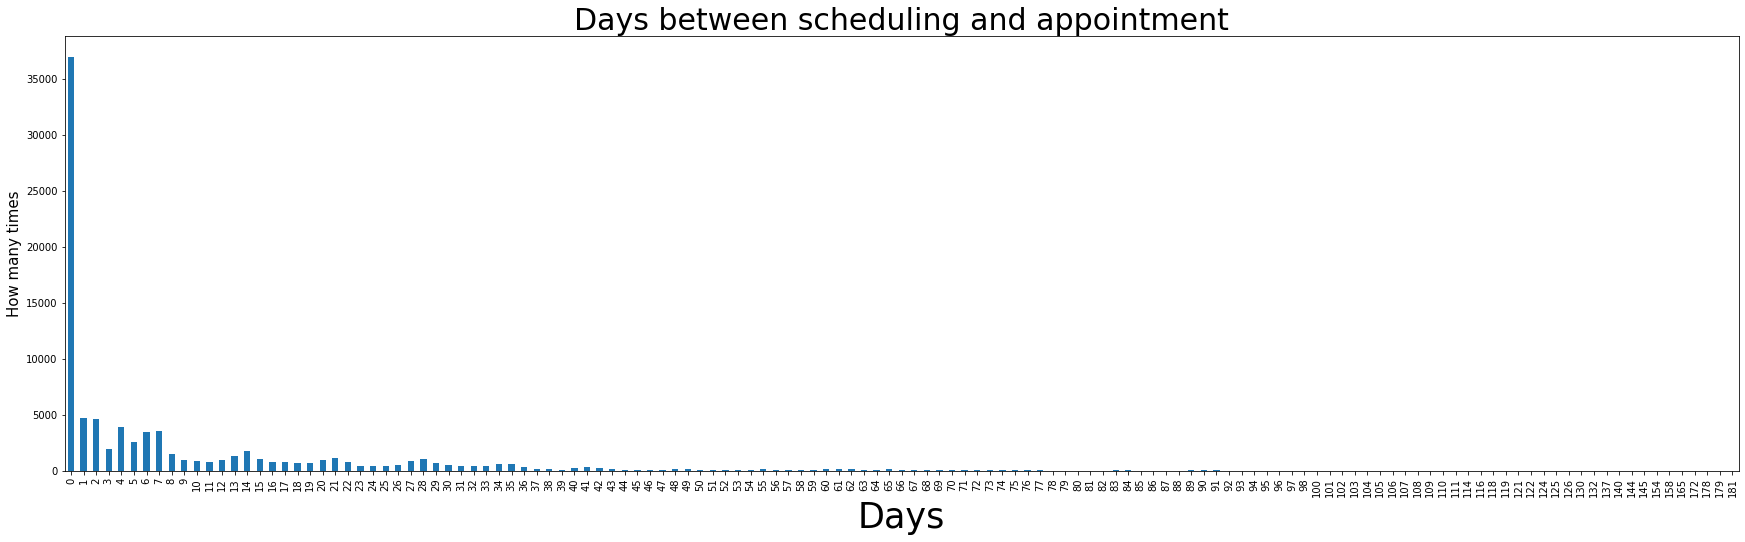

In [44]:
days_diff = df.groupby(['delta_days']).no_show.sum().plot(kind = 'bar', figsize=(30,8));
days_diff.set_ylabel('How many times', fontsize = 15);
days_diff.set_xlabel('Days', fontsize = 35);
days_diff.set_title('Days between scheduling and appointment', fontsize = 30);

The above bar graph shows how much the number of days between scheduling and appointment is repeated among patients. It's obvious the most patients have scheduled the appointment at the same day. However, that doesn't show the ratio of the patient how showed up to patient who scheduled for each number of days.


From (value_counts()) method above, it's clear that almost as the time between scheduling and appointment increase the number of scheduling patient decrease, such that for some number of days there're only one or two patients. Also, there're a lot of number of days. Therefore, I'm going to cut those days in periods.

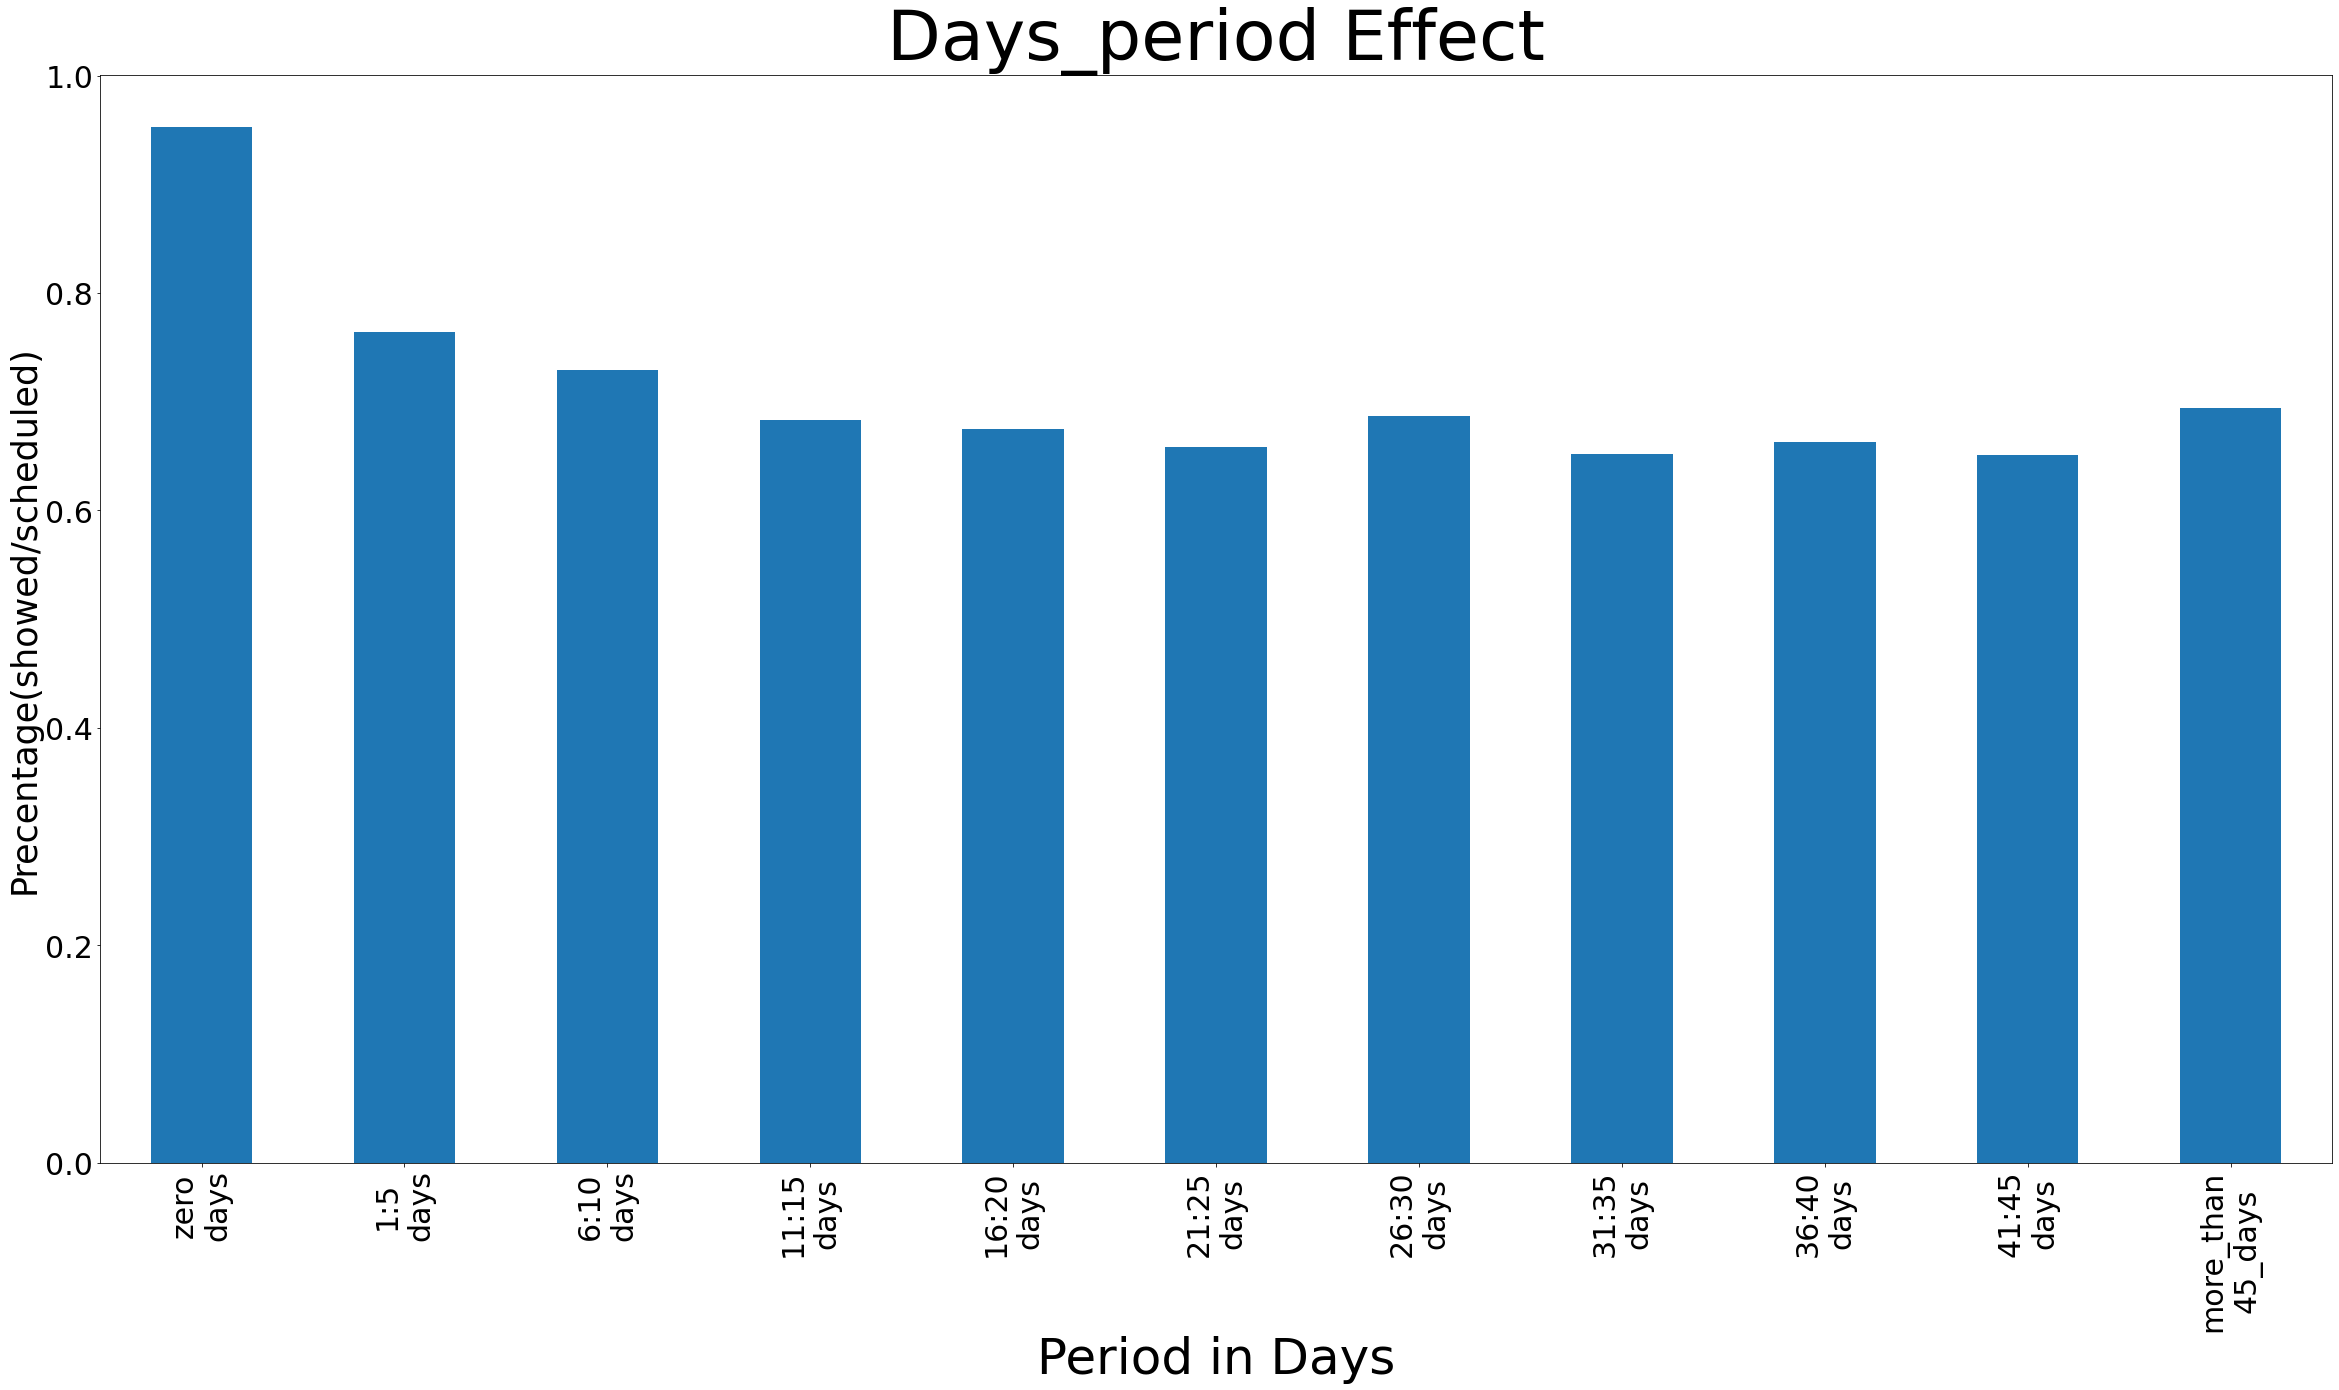

days_period
zero\ndays            0.952762
1:5\ndays             0.764179
6:10\ndays            0.729038
11:15\ndays           0.682838
16:20\ndays           0.675110
21:25\ndays           0.658050
26:30\ndays           0.687202
31:35\ndays           0.652347
36:40\ndays           0.663067
41:45\ndays           0.651391
more_than\n45_days    0.694364
Name: no_show, dtype: float64


In [45]:
#Cutting

period_edges = [-1, 0,5,10,15,20,25,30,35,40,45,182]
period_names = ['zero\ndays', '1:5\ndays', '6:10\ndays', '11:15\ndays','16:20\ndays','21:25\ndays','26:30\ndays','31:35\ndays','36:40\ndays','41:45\ndays','more_than\n45_days']
df['days_period'] = pd.cut(df.delta_days, period_edges, labels = period_names)

# graphing

#This figure show the ratio between how many people scheduled an appointment
# to how many actually have shown up for each number of days between scheduling and appointment
bar_graph('days_period','Days_period Effect', 'Period in Days')

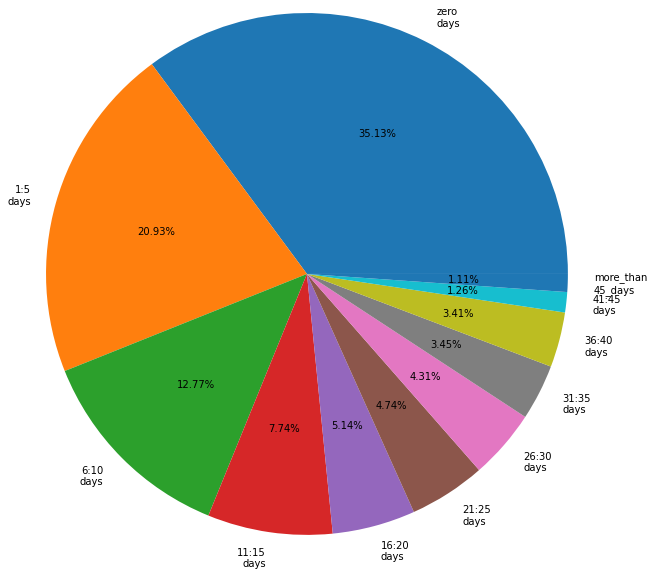


Number of patients for different periods who scheduled an appointment
zero\ndays            38825
1:5\ndays             23132
6:10\ndays            14109
11:15\ndays            8554
16:20\ndays            5685
26:30\ndays            5243
21:25\ndays            4758
more_than\n45_days     3815
31:35\ndays            3771
36:40\ndays            1389
41:45\ndays            1222
Name: days_period, dtype: int64 


Number of patients for different periods who showed up
days_period
zero\ndays            36991
1:5\ndays             17677
6:10\ndays            10286
11:15\ndays            5841
16:20\ndays            3838
21:25\ndays            3131
26:30\ndays            3603
31:35\ndays            2460
36:40\ndays             921
41:45\ndays             796
more_than\n45_days     2649
Name: no_show, dtype: int64


In [46]:
# The precentage of patients for each number of days between scheduling and appointment who scheduled an appointment
plt.pie(df.days_period.value_counts(),autopct = '%0.2f%%',labels = period_names, radius =3)
plt.show()
#number of patients for each number of days between scheduling and appointment who scheduled an appointment
print('\nNumber of patients for different periods who scheduled an appointment')
print(df.days_period.value_counts(),'\n')
print('\nNumber of patients for different periods who showed up')
#Number of patients for each number of days between scheduling and appointment who showed up
print(df.groupby(['days_period']).no_show.sum())


The graphs shows that the patients who scheduled their appoinment in the same day are more likely to show up (95%) by more than (18%) above the second high precentage (76% for 1:5 days). This is the strong correlation so far.

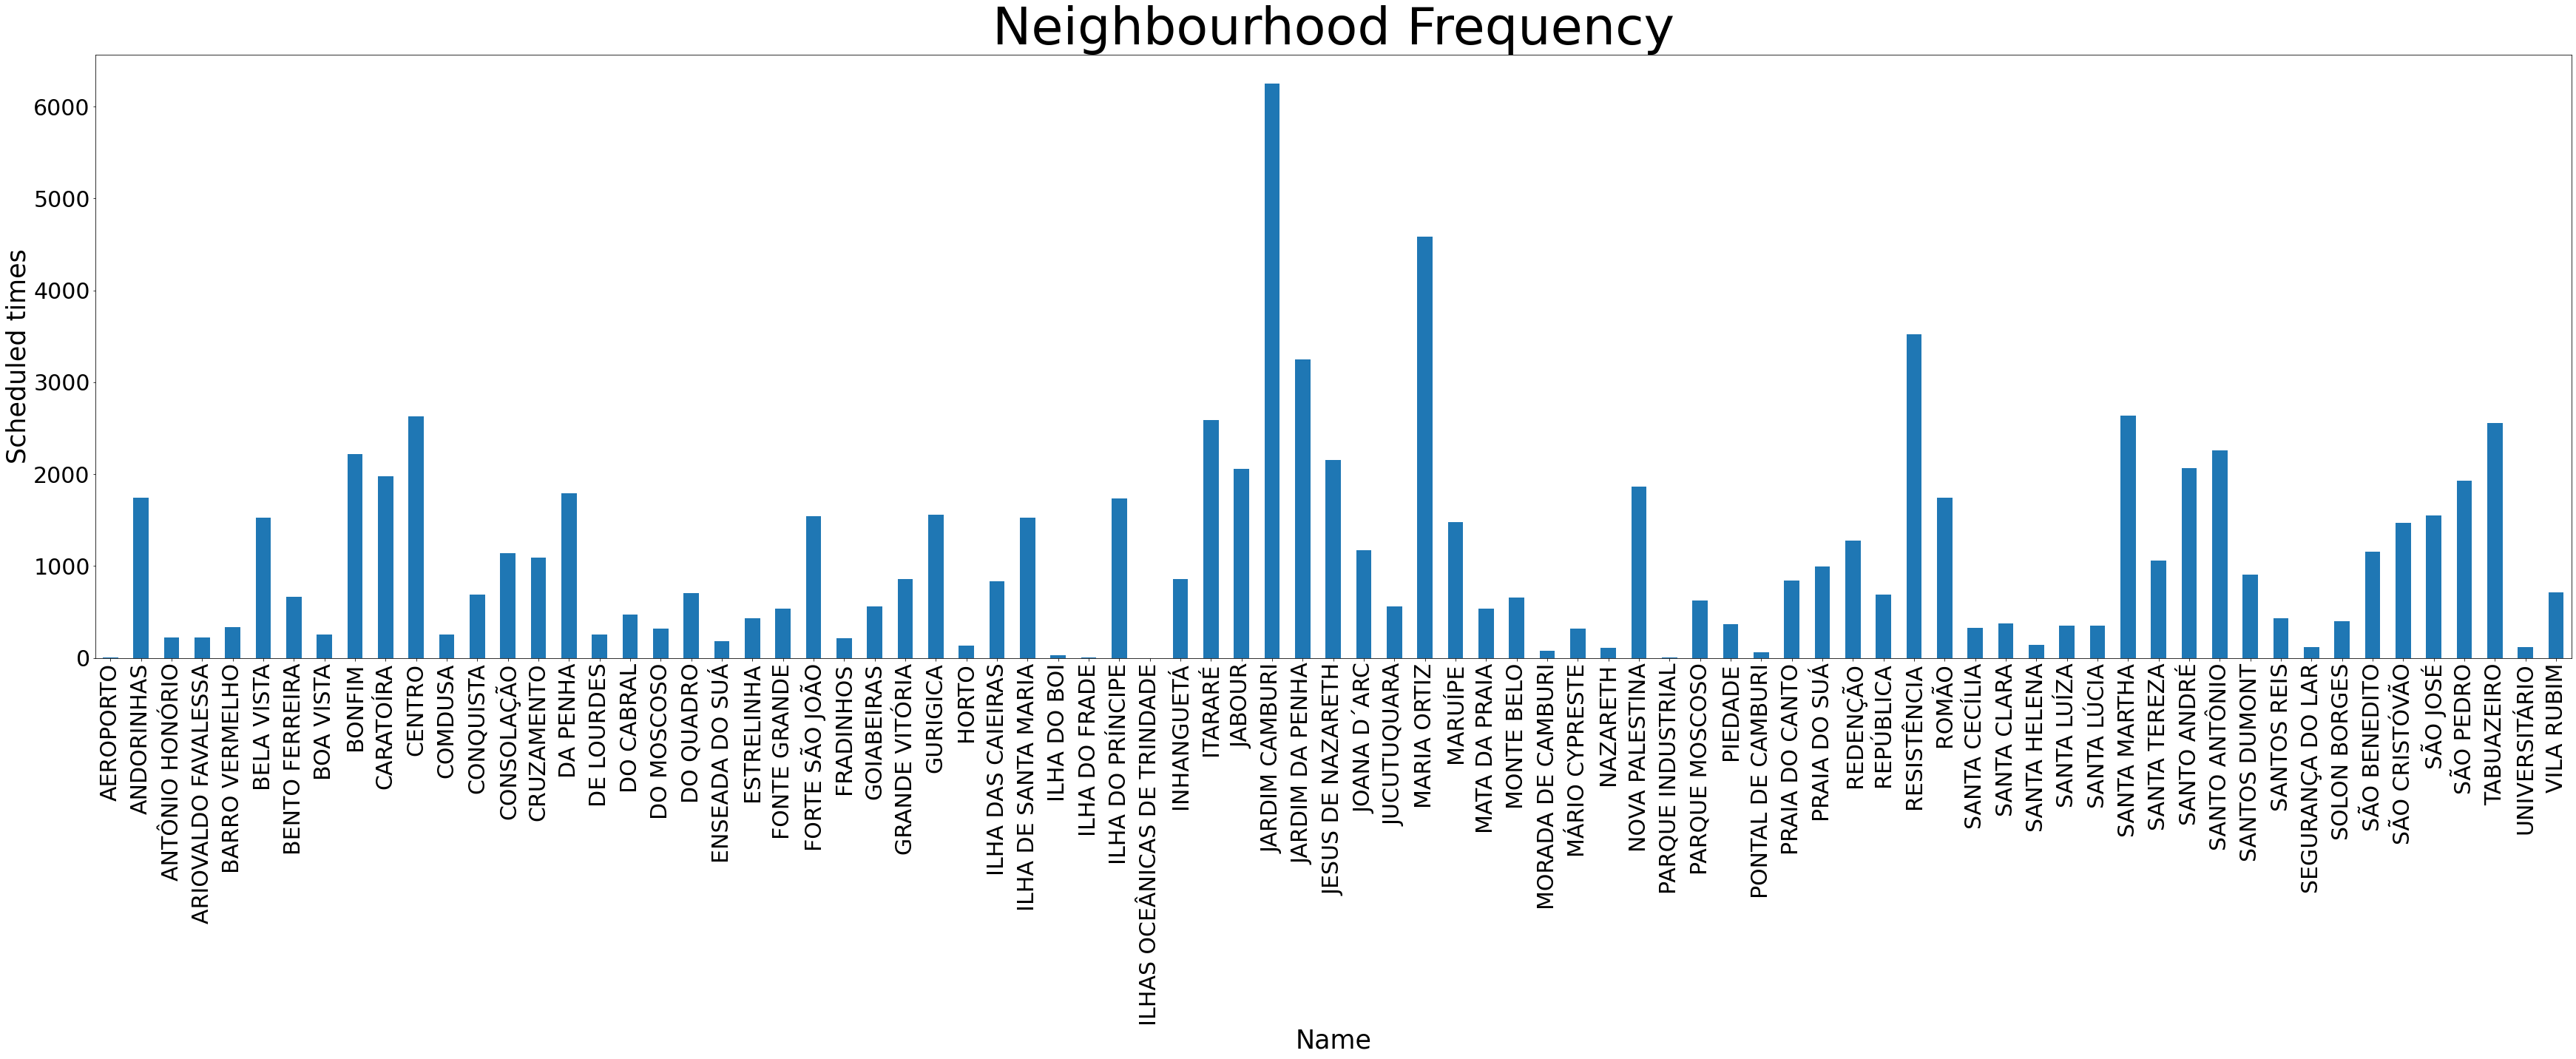

NAZARETH                       135
MORADA DE CAMBURI               96
PONTAL DE CAMBURI               69
ILHA DO BOI                     35
ILHA DO FRADE                   10
AEROPORTO                        8
ILHAS OCEÂNICAS DE TRINDADE      2
PARQUE INDUSTRIAL                1
Name: neighbourhood, dtype: int64
81


In [47]:
neighbourhood_effect = df.groupby(['neighbourhood']).no_show.sum().plot(kind = 'bar', figsize=(60,15),fontsize=30);
neighbourhood_effect.set_ylabel('Scheduled times', fontsize = 35);
neighbourhood_effect.set_xlabel('Name', fontsize = 35);
neighbourhood_effect.set_title('Neighbourhood Frequency', fontsize = 70);
plt.show()
print((df.neighbourhood.value_counts())[-8:])
print(df.neighbourhood.nunique())

The above bar graph shows how much each neighbourhood clinic is scheduled for a visit. It's obvious the most scheduled neighbourhood is "JARDIM CAMBURI". However, that doesn't show the ratio of the patients how showed up to patients who scheduled for each number of days.

From (value_counts()) method above and the graph, it's clear that some neighbourhoods are scheduled much more than others. Neighbourhood with small number of patients will give wrong representation about the effect of the neighbourhood on the showing up of the clinic. Therefore, I will neglect neighbourhoods with patients less than 100 appointments. Since there're only 81 clinic and more than 110k patients, the average number of patients for clinic is more than 1k patients which makes clinics with less than 100 negligible. In addition, since this is the last factor to explore, neglecting those clinics won't affect other factors

In [48]:
#Droping small neighbourhoods
small= ['MORADA DE CAMBURI','PONTAL DE CAMBURI', 'ILHA DO BOI','ILHA DO FRADE','AEROPORTO','ILHAS OCEÂNICAS DE TRINDADE','PARQUE INDUSTRIAL']

for i in small:
    df = df[(df['neighbourhood']) != i]

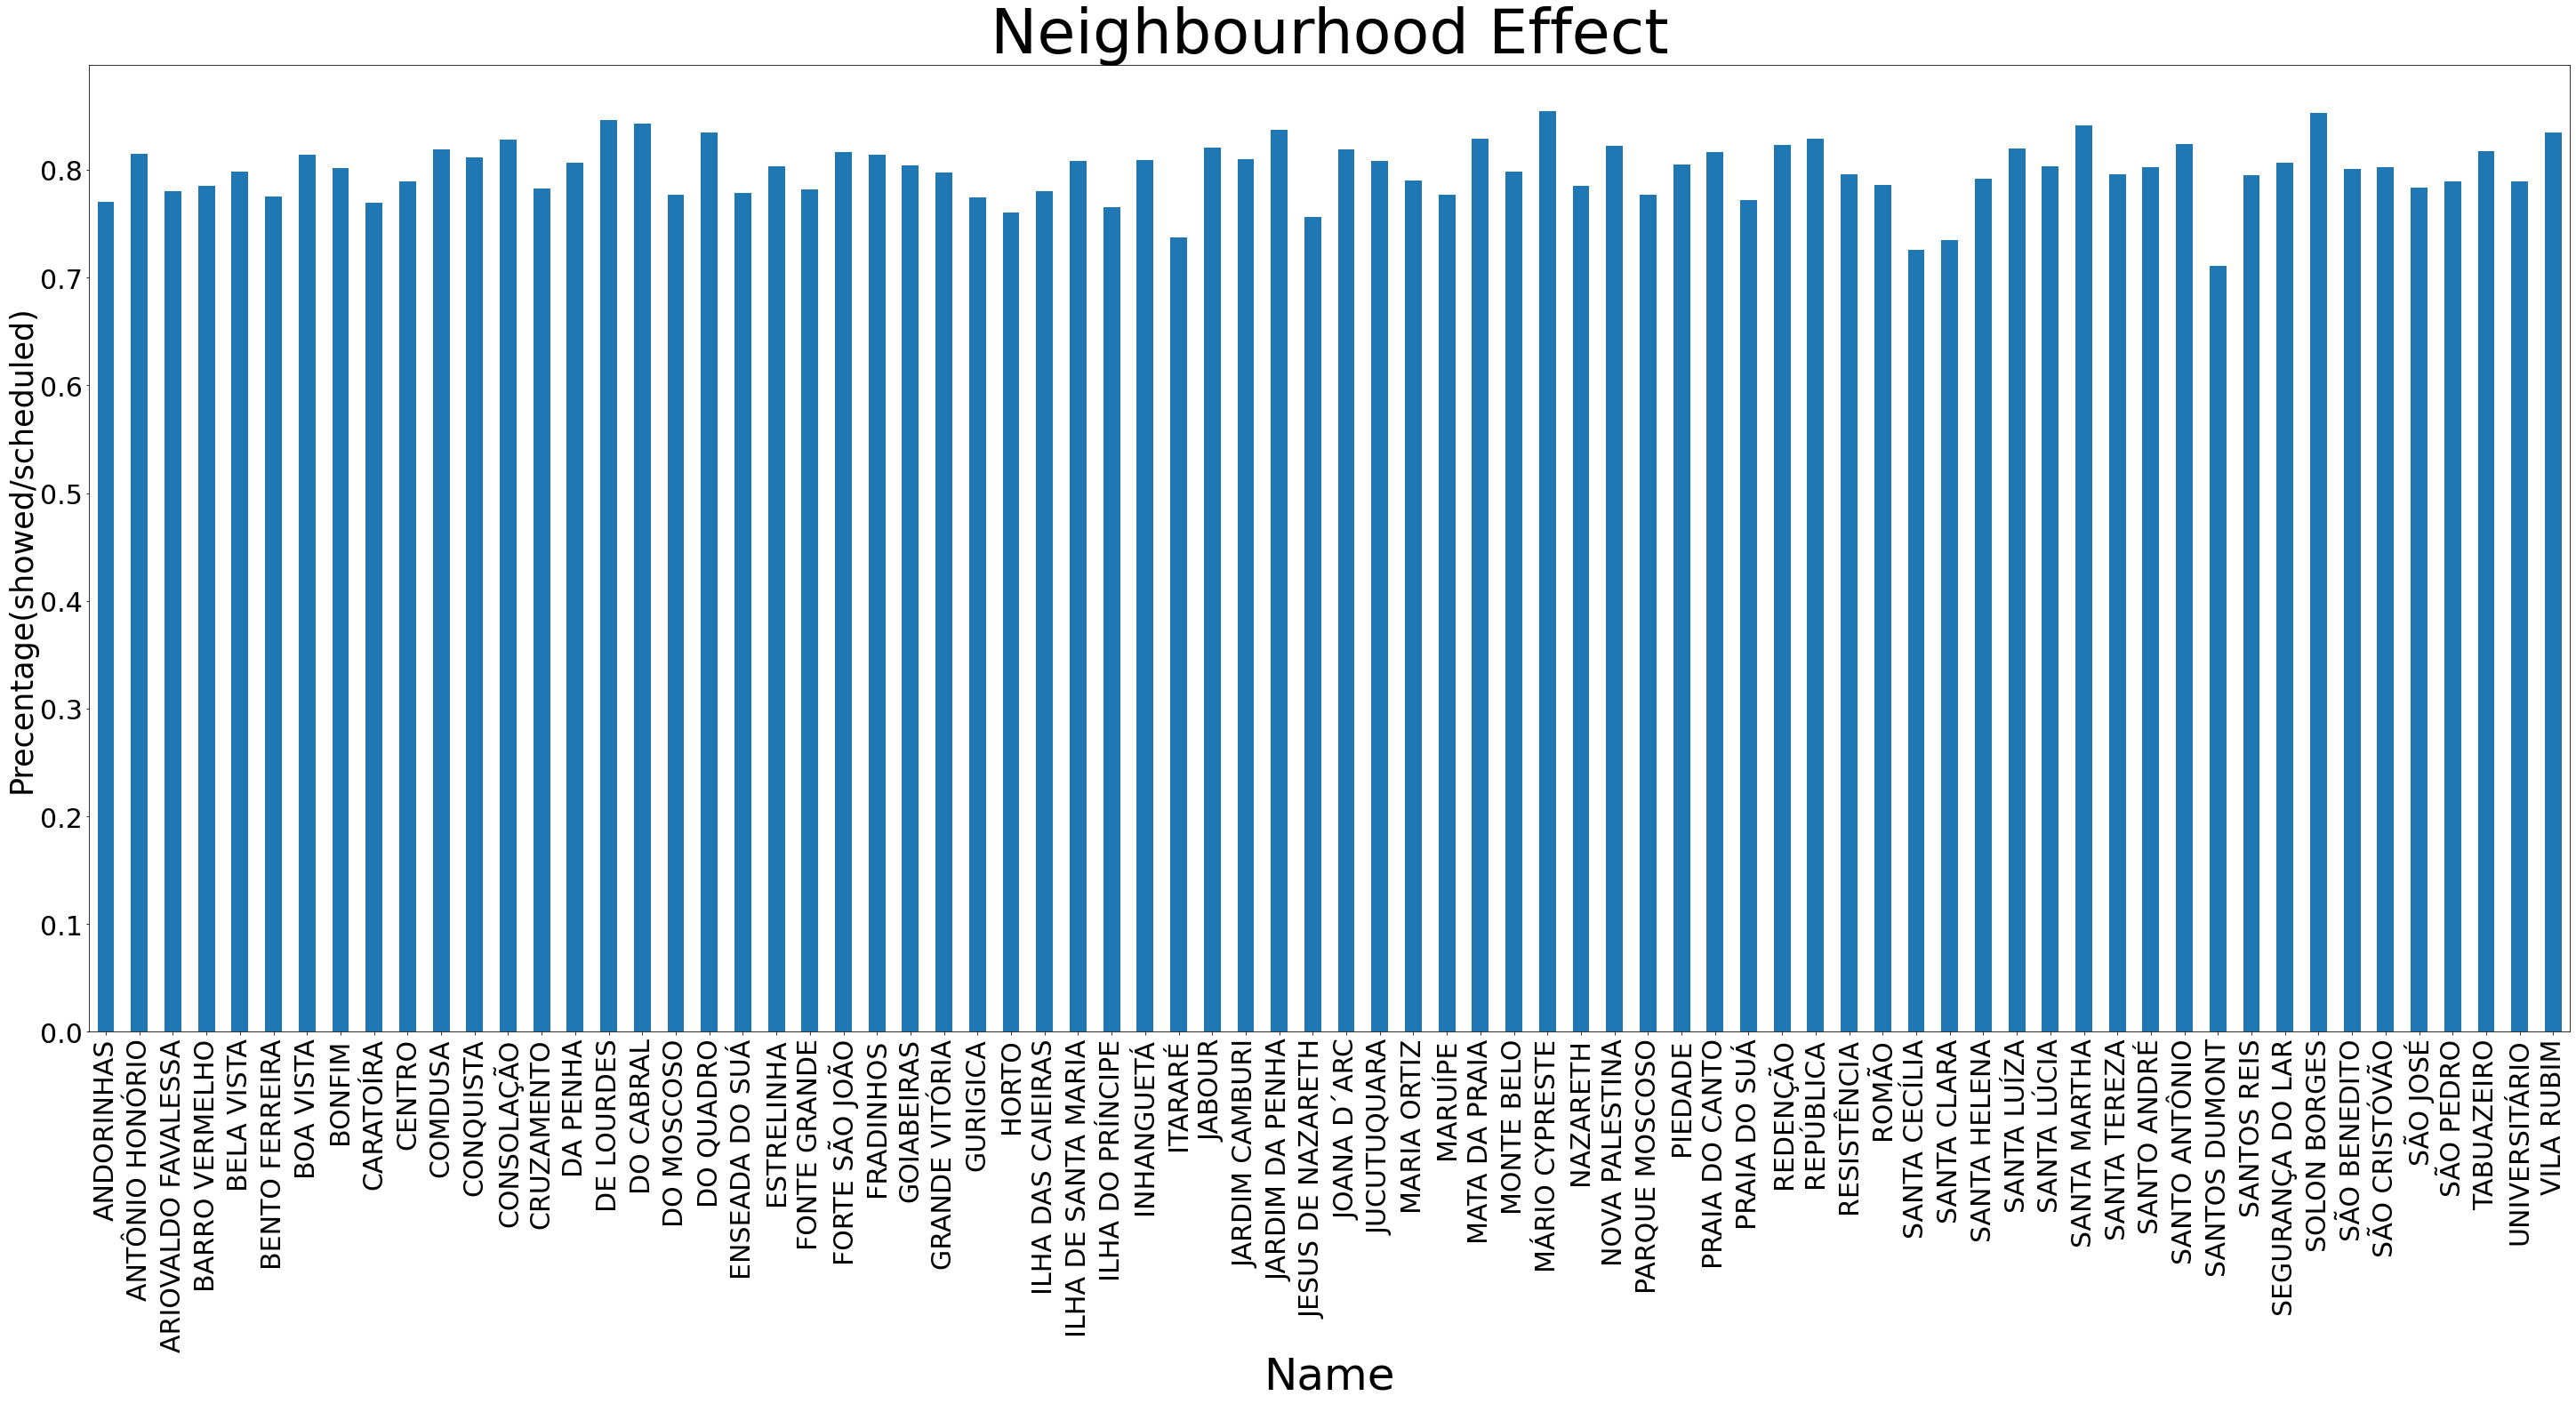

neighbourhood
ANDORINHAS             0.770593
ANTÔNIO HONÓRIO        0.814815
ARIOVALDO FAVALESSA    0.780142
BARRO VERMELHO         0.784870
BELA VISTA             0.798637
                         ...   
SÃO JOSÉ               0.783401
SÃO PEDRO              0.789538
TABUAZEIRO             0.817194
UNIVERSITÁRIO          0.789474
VILA RUBIM             0.834313
Name: no_show, Length: 74, dtype: float64


In [49]:
# graphing

#This figure show the ratio between how many people scheduled an appointment
# to how many actually have shown up for each neighbourhood
neighbourhood_factor = df.groupby(['neighbourhood']).no_show.mean().plot( kind = 'bar', figsize = (50,20),fontsize = 30 );

neighbourhood_factor.set_title('Neighbourhood Effect', fontsize = 70);
neighbourhood_factor.set_xlabel('Name', fontsize = 50);
neighbourhood_factor.set_ylabel("Precentage(showed/scheduled)", fontsize = 35);
plt.show()
print(df.groupby(['neighbourhood']).no_show.mean())

The difference in the ratios is small and changes from neighbourhood to the next with no clear pattern. Also, that ratio has no thing to do with number of appointments scheduled in each neighbourhood

<a id='conclusions'></a>
## Conclusions


>    Although when exploring the gender, age and alcoholism, there were huge difference between the numbers of patients from each gender, having difference age, visiting differenct neighbourhood and whether they have alcoholism or not; There is no clear noticable changes in the ratio of showing up to scheduling in each factor individually. However, in other factors, hypernation, diabetes, scholarship and handicap, there're small differenced in the showing up ratio as follows, patients with hypernation has higher ratio of showing up by 3% more than those without. Patients having scholarship have lower ratio by 4% lower than those who have not. Patients with diabetes have 2% higher ratio and patients with handicap have 2% higher.
    
>    In addition, there is clearer difference between people who received sms and people who didn't. As, surprisingly patients who didn't receive has a ratio of 83%, while people who received have only 72% showing up ratio. Also, there is a clear noticable difference when taking the period between the scheduling time and the appointment time. Most patients tend to have appointment on the same day of scheduling. Most importantly, patients who scheduled their appointment on the same day have the highest ratio of showing up by more than 17% of scheduling on any other day.



### Limitations
>    Showing a correlation between the ratio of showing up to scheduling and the age or the neighbourhood requires a lot of number of patients scheduling for each age and at each neighbour to determine of that age or nieghbourhood has a represetative data. That isn't the case for a lot of neighbourhoods and ages which makes it almost impossible to make good use of the given data to answer our question. 
